# **Data Mining and Big Data Analytics Coursework Report**
### Module Code: CSI_6_DMA
### Student: Yusuf Muysinkhanov
### Date: 30 March 2024
### Link to the file: https://colab.research.google.com/drive/1TAzQ4Iwweh8qMsLNRPMI5Q6Kc_kcAbgD



---



# **Table of Contents**:

### 1. [Introduction](#scrollTo=0B0OVK-Z2kN6&line=1&uniqifier=1)
### 2. [The Data Mining Approach](#scrollTo=sNxLU9Ay2oU4&line=1&uniqifier=1)
### 3. [Importing Libraries](#scrollTo=T9mjK5sA5j7t&line=1&uniqifier=1)
### 4. [Loading the London Fire Brigade Data](#scrollTo=Ab3kC7bA5n_s&line=1&uniqifier=1)
### 5. [Business Understanding](#scrollTo=W-Qat7xwwMGu&line=1&uniqifier=1)
### 6. [Data Understanding](#scrollTo=-vB-dh2RwUn1&line=1&uniqifier=1)
### 7. [Data Preprocessing](#scrollTo=6EN-Njc3wcpE&line=1&uniqifier=1)
### 8. [Modelling](#scrollTo=LFvi2aluwkxV&line=1&uniqifier=1)
### 9. [Evaluation](#scrollTo=0BuQ4eIFwqju&line=1&uniqifier=1)
### 10. [Conclusion](#scrollTo=T9s_UellZX1E&line=1&uniqifier=1)
### [References](#scrollTo=OLh-N3QGlpew)




---



# **1. Introduction**

In this data mining project, the focus is to analyse the London Fire Brigade dataset to uncover essential patterns and correlations that address the real-world problem concerning fire incidents. The report will start with explaining the methodology, definition of keywords, and importing the dataset. After this, the methodology - CRISP-DM (Cross Industry Standard Process for Data Mining) will be followed where the dataset will be examined within its business context to identify meaningful problems that can be addressed by using analytics, followed by data exploration to understand more about the data. Next will be data preparation and then modelling. Finally, an evaluation and summary of findings will be produced.

# **2. The Data Mining Approach**

In order to standardise the data mining knowledge and discovery process and convert the activities in this project into a set of logical steps, the CRISP-DM approach will be utilised which stands for Cross-Industry Standard Process for Data Mining, is an industry-proven way
to guide data mining efforts (IBM, 2021).

- As a methodology, it includes descriptions of the typical phases of a project, the tasks involved with each phase, and an explanation of the relationships between these tasks.
- As a process model, CRISP-DM provides an overview of the data mining life cycle.


The CRISP-DM is a six-phase methodology which will be used to provide a structured approach to the project. The descriptions of all the phases in the CRISP-DM are the following:

1. **Business Understanding**: Focuses on understanding the project objectives and requirements from a business perspective(Sridharan, 2018).
2. **Data Understanding** : This stage involves exploration of the data to find details such as number of instances in the dataset, the data type of each attribute and basic statistics like standard deviation, average and range to help in identifying missing values and outliers (IBM, 2021)
3. **Data Preparation**: This stage is the most time-consuming phase (Chen, 2024) and involves preparing the data for modelling such as feature selection, reducing dimensionality and transforming data.
4. **Modelling**: This involves choosing and applying data mining techniques, selecting the best model, and fine-tuning it for optimal performance.
5. **Evaluation**: Assessing the models quality and peformance through testing and validation.
6. **Deployment**: Hosting, monitoring and maintaining the model in a real world.

This project will be implementing the first 5 phases and leaving the deployment for the future since it is outside the scope of the assignment.

# **3. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew, kurtosis,zscore,norm
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # z-score normalisation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn import tree
from mlxtend.preprocessing import TransactionEncoder # One-hot encoding.
from mlxtend.frequent_patterns import apriori, association_rules # apriori: identify freq item and use them to form rules
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# **4. Loading the London Fire Brigade Data**

(!) Encoding related problem occured while loading the original dataset with the ".xlsx" extension:

In [ ]:
problematic_load_example = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LFB_2019-22.xlsx')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc9 in position 14: invalid continuation byte

To fix the above problem, I had to change the the original file to ".csv" with a utf-8 encoding using an answer (Zuo et al., 2019) in the stackoverflow thread (https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s).

In [ ]:
lfb_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LFB_2019-22.csv')

Now that the dataset has been imported successfully, it can be called below to have a peak:

In [ ]:
lfb_data.head(10)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000006-01012019,01 Jan 2019,2019,00:01:45,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2.0
1,000019-01012019,01 Jan 2019,2019,00:04:33,0,Fire,Secondary Fire,NaN,Outdoor,Tree scrub,...,357.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
2,000020-01012019,01 Jan 2019,2019,00:04:39,0,False Alarm,False alarm - Good intent,NaN,Outdoor,Domestic garden (vegetation not equipment),...,318.0,Southgate,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
3,000021-01012019,01 Jan 2019,2019,00:04:44,0,False Alarm,AFA,NaN,Dwelling,Stately Home (part not open to public),...,210.0,Kensington,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
4,000024-01012019,01 Jan 2019,2019,00:05:00,0,Special Service,Special Service,Lift Release,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,329.0,Bethnal Green,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
5,000028-01012019,01 Jan 2019,2019,00:05:33,0,False Alarm,False alarm - Good intent,NaN,Dwelling,House - single occupancy,...,422.0,East Ham,520.0,Plaistow,2.0,2.0,2.0,3.0,999.0,3.0
6,000040-01012019,01 Jan 2019,2019,00:07:20,0,False Alarm,False alarm - Good intent,NaN,Outdoor,Domestic garden (vegetation not equipment),...,180.0,Walthamstow,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
7,000060-01012019,01 Jan 2019,2019,00:11:22,0,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,335.0,Clapham,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
8,000061-01012019,01 Jan 2019,2019,00:11:32,0,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,369.0,Stanmore,486.0,Harrow,2.0,2.0,4.0,4.0,1332.0,5.0
9,000064-01012019,01 Jan 2019,2019,00:12:49,0,Special Service,Special Service,Effecting entry/exit,Dwelling,House - single occupancy,...,268.0,North Kensington,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0


The code below filters the LFB data to include only the rows associated with the borough of Hackney which is accomplished by checking the column "IncGeo_BoroughCode" against the code "E09000012".

In [ ]:
hackney_data = lfb_data.loc[lfb_data['IncGeo_BoroughCode'] == 'E09000012']

In [ ]:
df = pd.DataFrame(hackney_data)

In [ ]:
df.head(10)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
85,000269-01012019,01 Jan 2019,2019,02:08:32,2,Fire,Primary Fire,NaN,Road Vehicle,Motorcycle,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,333.0,3.0
96,000303-01012019,01 Jan 2019,2019,03:09:01,3,False Alarm,AFA,NaN,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,...,273.0,Bethnal Green,520.0,Whitechapel,2.0,2.0,2.0,1.0,333.0,1.0
99,000306-01012019,01 Jan 2019,2019,03:17:55,3,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,...,514.0,Homerton,519.0,Islington,5.0,5.0,5.0,2.0,666.0,1.0
105,000326-01012019,01 Jan 2019,2019,04:26:33,4,False Alarm,False alarm - Good intent,NaN,Outdoor,Road surface/pavement,...,357.0,Stoke Newington,471.0,Tottenham,2.0,2.0,2.0,1.0,333.0,1.0
112,000339-01012019,01 Jan 2019,2019,05:31:16,5,Fire,Secondary Fire,NaN,Outdoor Structure,Small refuse/rubbish container,...,260.0,Shoreditch,352.0,Islington,2.0,2.0,2.0,1.0,333.0,2.0
120,000362-01012019,01 Jan 2019,2019,06:26:42,6,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,...,238.0,Shoreditch,366.0,Islington,2.0,2.0,2.0,1.0,333.0,1.0
128,000378-01012019,01 Jan 2019,2019,07:34:02,7,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,157.0,Shoreditch,300.0,Whitechapel,2.0,2.0,2.0,1.0,333.0,1.0
129,000379-01012019,01 Jan 2019,2019,07:45:09,7,Special Service,Special Service,Medical Incident,Outdoor,Road surface/pavement,...,3.0,Shoreditch,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
150,000413-01012019,01 Jan 2019,2019,10:50:27,10,Fire,Secondary Fire,NaN,Outdoor,Loose refuse,...,357.0,Stoke Newington,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
178,000457-01012019,01 Jan 2019,2019,13:52:28,13,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,239.0,Stoke Newington,364.0,Homerton,2.0,2.0,2.0,1.0,333.0,1.0


To confirm that all the the filtered data are indeed from the borough of Hackney (E09000012), we can run this code:

In [ ]:
df['IncGeo_BoroughCode']

85        E09000012
96        E09000012
99        E09000012
105       E09000012
112       E09000012
            ...    
426314    E09000012
426319    E09000012
426392    E09000012
426407    E09000012
426441    E09000012
Name: IncGeo_BoroughCode, Length: 16953, dtype: object

The assigned dataset is now ready to work on. The next sections will be based on the CRISP-DM methodology.

# **5. Business Understanding**

1. **How time of a day and a year (season) affect which type of properties are calling most for fire hazards?**

  *By identifying the peak time for fire hazard calls from different properties in every season, fire brigades can be better prepared for potential fire alarms throughout the whole year?*


2. **Does incident triggers cause any difference in how fast the first pump arrives?**

  *Getting more infomation about whether certain incident trigger (i.e, false alarms) are taking up a lot of fire brigades' time thus costing more money is useful for coming up with solutions to reduce the number of false alarms.*


3. **Which wards in Hackney have most fires and costed the most from pump deployments?**

  *Identifying the wards with high number of fires can help with educating the right people more about the fire hazards and potentially reducing fire calls as well as saving money for the borough.*


4. **Find out which postcode district the fire calls coming from and what seasons are most likely to be classified as false alarms?**

  *This information will be instrumental in suggesting the repairments/replacements of fire alarm systems in certain postcodes.*


5. **Is the time from the call to the first pump deployment reducing year by year?**
  
  *Finding out if the response time is getting better every year helps to plan upcoming years and look for other shortcomings in the overall process since one of the elements is checked out.*

These business problems will be reevaluated and translated to data problems in the data understanding and preprocessing sections.

# **6. Data Understanding**

The dataset will now be explored to better understand and determine if the dataset is appropriate to address the business problems identified in the previous "business understanding" section. Additionally, the dataset will be analysed to detect any quality issues like missing values and outliers in both cateogrical and numerical attributes.

## **6.1. Initial Data Exploration**

In [ ]:
print('Total number of instances and attributes in the data:', df.shape)

Total number of instances and attributes in the data: (16953, 39)


In [ ]:
# Display the data type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16953 entries, 85 to 426441
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IncidentNumber                          16953 non-null  object 
 1   DateOfCall                              16953 non-null  object 
 2   CalYear                                 16953 non-null  int64  
 3   TimeOfCall                              16953 non-null  object 
 4   HourOfCall                              16953 non-null  int64  
 5   IncidentGroup                           16953 non-null  object 
 6   StopCodeDescription                     16953 non-null  object 
 7   SpecialServiceType                      7411 non-null   object 
 8   PropertyCategory                        16953 non-null  object 
 9   PropertyType                            16953 non-null  object 
 10  AddressQualifier                        16953 non-null  

The information above shows that 18 out of 39 columns in the dataset are numbers (13 of which are floats, and the rest integers). This overview may seem that statistical calculation and meaningful arithmetics can be performed on those columns to find the mode, mean, skewness, standard deviation etc on the columns/attributes.

However, it must be noted, not all the float or integer columns require statistical operation because some are categorical (classes). For example, although the **HourOfCall** is an integer column, it is meaningless to find the skewness or standard deviation as it is categorical since there are only 24 hours a day. So, this column will be converted to represent categorical value.

Some of the data types presented in df.info() are actually integers. These are: **FirstPumpArriving_AttendanceTime, SecondPumpArriving_AttendanceTime, NumStationsWithPumpsAttending, NumPumpsAttending, PumpCount, PumpHoursRoundUp, NumCalls**. These columns need to be converted to int data type before moving on but there might be NaN values which prevents the conversion so they need to be set to 0 on the specified columns to make the conversion work.

Finally, from the data information, all columns are non-null, implying that each column/attribute has valid types, although there are null/missing values in between which will be explored in the next section.

In [ ]:
# Conveting the HourOfCall to categorical
columns_to_categorical = ['HourOfCall']
df[columns_to_categorical] = df[columns_to_categorical].astype('str')

# Converting the below float columns to integer
columns_to_integer = ['FirstPumpArriving_AttendanceTime',
                      'SecondPumpArriving_AttendanceTime',
                      'NumStationsWithPumpsAttending',
                      'NumPumpsAttending',
                      'PumpCount',
                      'PumpHoursRoundUp',
                      'NumCalls']
df[columns_to_integer] = df[columns_to_integer].fillna(0).astype('int64')

# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16953 entries, 85 to 426441
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IncidentNumber                          16953 non-null  object 
 1   DateOfCall                              16953 non-null  object 
 2   CalYear                                 16953 non-null  int64  
 3   TimeOfCall                              16953 non-null  object 
 4   HourOfCall                              16953 non-null  object 
 5   IncidentGroup                           16953 non-null  object 
 6   StopCodeDescription                     16953 non-null  object 
 7   SpecialServiceType                      7411 non-null   object 
 8   PropertyCategory                        16953 non-null  object 
 9   PropertyType                            16953 non-null  object 
 10  AddressQualifier                        16953 non-null  

Now that all the columns are represented with their correct data types, it is time to calculate basic statistics (value range,
average, standard deviation, skewness,
kurtosis, and mode) for each numerical attributes.

In [ ]:
# Display count, mean, standard deviation, min, max and percentiles.
df.describe() # Note the describe() method selects numeric columns by itself and performs calculations on them

,CalYear,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,16953.000000,1.695300e+04,1.695300e+04,5297.000000,5297.000000,16953.000000,16953.000000,5297.000000,5297.000000,16953.000000,16953.000000,16953.000000,16953.000000,16953.000000,16953.000000,16837.000000,16953.000000
mean,2020.540671,1.890934e+10,2.090570e+07,534014.669058,184984.840476,534063.089129,185215.138913,51.401874,-0.068415,264.282133,135.049667,1.401994,1.581490,1.624904,1.281071,449.618400,1.293104
std,1.124143,3.945328e+10,4.933197e+04,1174.629112,1666.190117,1177.158574,1550.849930,2.739510,0.017354,139.714722,192.458053,0.880395,1.010611,1.158910,2.264376,776.701626,1.357920
min,2019.000000,0.000000e+00,2.090000e+07,531508.000000,181860.000000,531550.000000,181850.000000,0.000000,-0.104073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,333.000000,1.000000
25%,2020.000000,0.000000e+00,2.090033e+07,533146.000000,183562.000000,533150.000000,183950.000000,51.535100,-0.081418,201.000000,0.000000,1.000000,1.000000,1.000000,1.000000,339.000000,1.000000
50%,2021.000000,0.000000e+00,2.090066e+07,533663.000000,184988.000000,533850.000000,185150.000000,51.547629,-0.072998,270.000000,0.000000,1.000000,1.000000,1.000000,1.000000,352.000000,1.000000
75%,2022.000000,1.000831e+10,2.090096e+07,534870.000000,186420.000000,534950.000000,186550.000000,51.560654,-0.056085,336.000000,302.000000,2.000000,2.000000,2.000000,1.000000,364.000000,1.000000
max,2022.000000,2.000030e+11,2.270236e+07,540211.000000,188303.000000,540250.000000,188350.000000,51.577570,0.021857,1197.000000,1197.000000,8.000000,12.000000,41.000000,192.000000,65088.000000,70.000000


From the above table, it can be seen that not all the columns are suitable for the calculations and can be omitted from the table because they do not measure anything and they are just representing time or location as numbers. After the omission, we are going to be left with columns: **FirstPumpArriving_AttendanceTime, SecondPumpArriving_AttendanceTime, NumStationsWithPumpsAttending, NumPumpsAttending, PumpCount, PumpHoursRoundUp, Notional Cost (£), NumCalls**.

Note that the naming of the column name **Notional Cost (£)** may cause errors in the future, so let's start by renaming it to **Notional_Cost_InPounds**.

In [ ]:
# Rename Notional Cost (£) to Notional_Cost_InPounds
df = df.rename(columns={'Notional Cost (£)': 'Notional_Cost_InPounds'})

In [ ]:
# Get the appropriate attributes for performing the above statistics
stat_column_names = ['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'PumpHoursRoundUp', 'Notional_Cost_InPounds', 'NumCalls']
stat_columns = df[stat_column_names]
stat_columns.head(10)

,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional_Cost_InPounds,NumCalls
85,0,0,1,1,1,1,333.0,3
96,273,520,2,2,2,1,333.0,1
99,514,519,5,5,5,2,666.0,1
105,357,471,2,2,2,1,333.0,1
112,260,352,2,2,2,1,333.0,2
120,238,366,2,2,2,1,333.0,1
128,157,300,2,2,2,1,333.0,1
129,3,0,1,1,1,1,333.0,1
150,357,0,1,1,1,1,333.0,1
178,239,364,2,2,2,1,333.0,1


Now that appropriate columns are selected, the meaningful statistics can be applied on this new data.

In [ ]:
stat_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
FirstPumpArriving_AttendanceTime,16953.0,264.282133,139.714722,0.0,201.0,270.0,336.0,1197.0
SecondPumpArriving_AttendanceTime,16953.0,135.049667,192.458053,0.0,0.0,0.0,302.0,1197.0
NumStationsWithPumpsAttending,16953.0,1.401994,0.880395,0.0,1.0,1.0,2.0,8.0
NumPumpsAttending,16953.0,1.581490,1.010611,0.0,1.0,1.0,2.0,12.0
PumpCount,16953.0,1.624904,1.158910,0.0,1.0,1.0,2.0,41.0
PumpHoursRoundUp,16953.0,1.281071,2.264376,0.0,1.0,1.0,1.0,192.0
Notional_Cost_InPounds,16837.0,449.618400,776.701626,333.0,339.0,352.0,364.0,65088.0
NumCalls,16953.0,1.293104,1.357920,1.0,1.0,1.0,1.0,70.0


The describe() method does not show the **mode**, **skewness** and **kurtosis** of the columns, hence, the code below was used to add those statistics:

In [ ]:
# Calculate skewness and kurtosis for the stat_columns
skewness = stat_columns.apply(skew)
kurt = stat_columns.apply(kurtosis)
modes = stat_columns.mode().iloc[0]

# Create a DataFrame to store the mode, skewness, and kurtosis
other_statistics_df = pd.DataFrame({'Mode': modes, 'Skewness': skewness, 'Kurtosis': kurt})

# Display mode, skewness, and kurtosis statistics for each column
other_statistics_df

,Mode,Skewness,Kurtosis
FirstPumpArriving_AttendanceTime,0.0,0.418418,2.635400
SecondPumpArriving_AttendanceTime,0.0,1.202315,0.934361
NumStationsWithPumpsAttending,1.0,2.600885,7.400465
NumPumpsAttending,1.0,2.238430,5.782063
PumpCount,1.0,5.741743,112.876390
PumpHoursRoundUp,1.0,52.521475,3845.471924
Notional_Cost_InPounds,352.0,NaN,NaN
NumCalls,1.0,18.588038,608.473845


The table indicates most attributes have leptokurtic distributions of the kurtosis (kurtosis > 3, excess kurtosis > 0) meaning they have sharp peak, heavy tails since the excess kurtosis there are more than 0 while other two attributes, SecondPumpArriving_AttendanceTime and Notional_Cost_InPounds, have a slightly sharp peak (still a leptokurtic distribution) and NaN value respectively. The kurtosis can be seen more clearly from the histograms below.

### **6.1.1. Visualising the stat_columns in histograms**

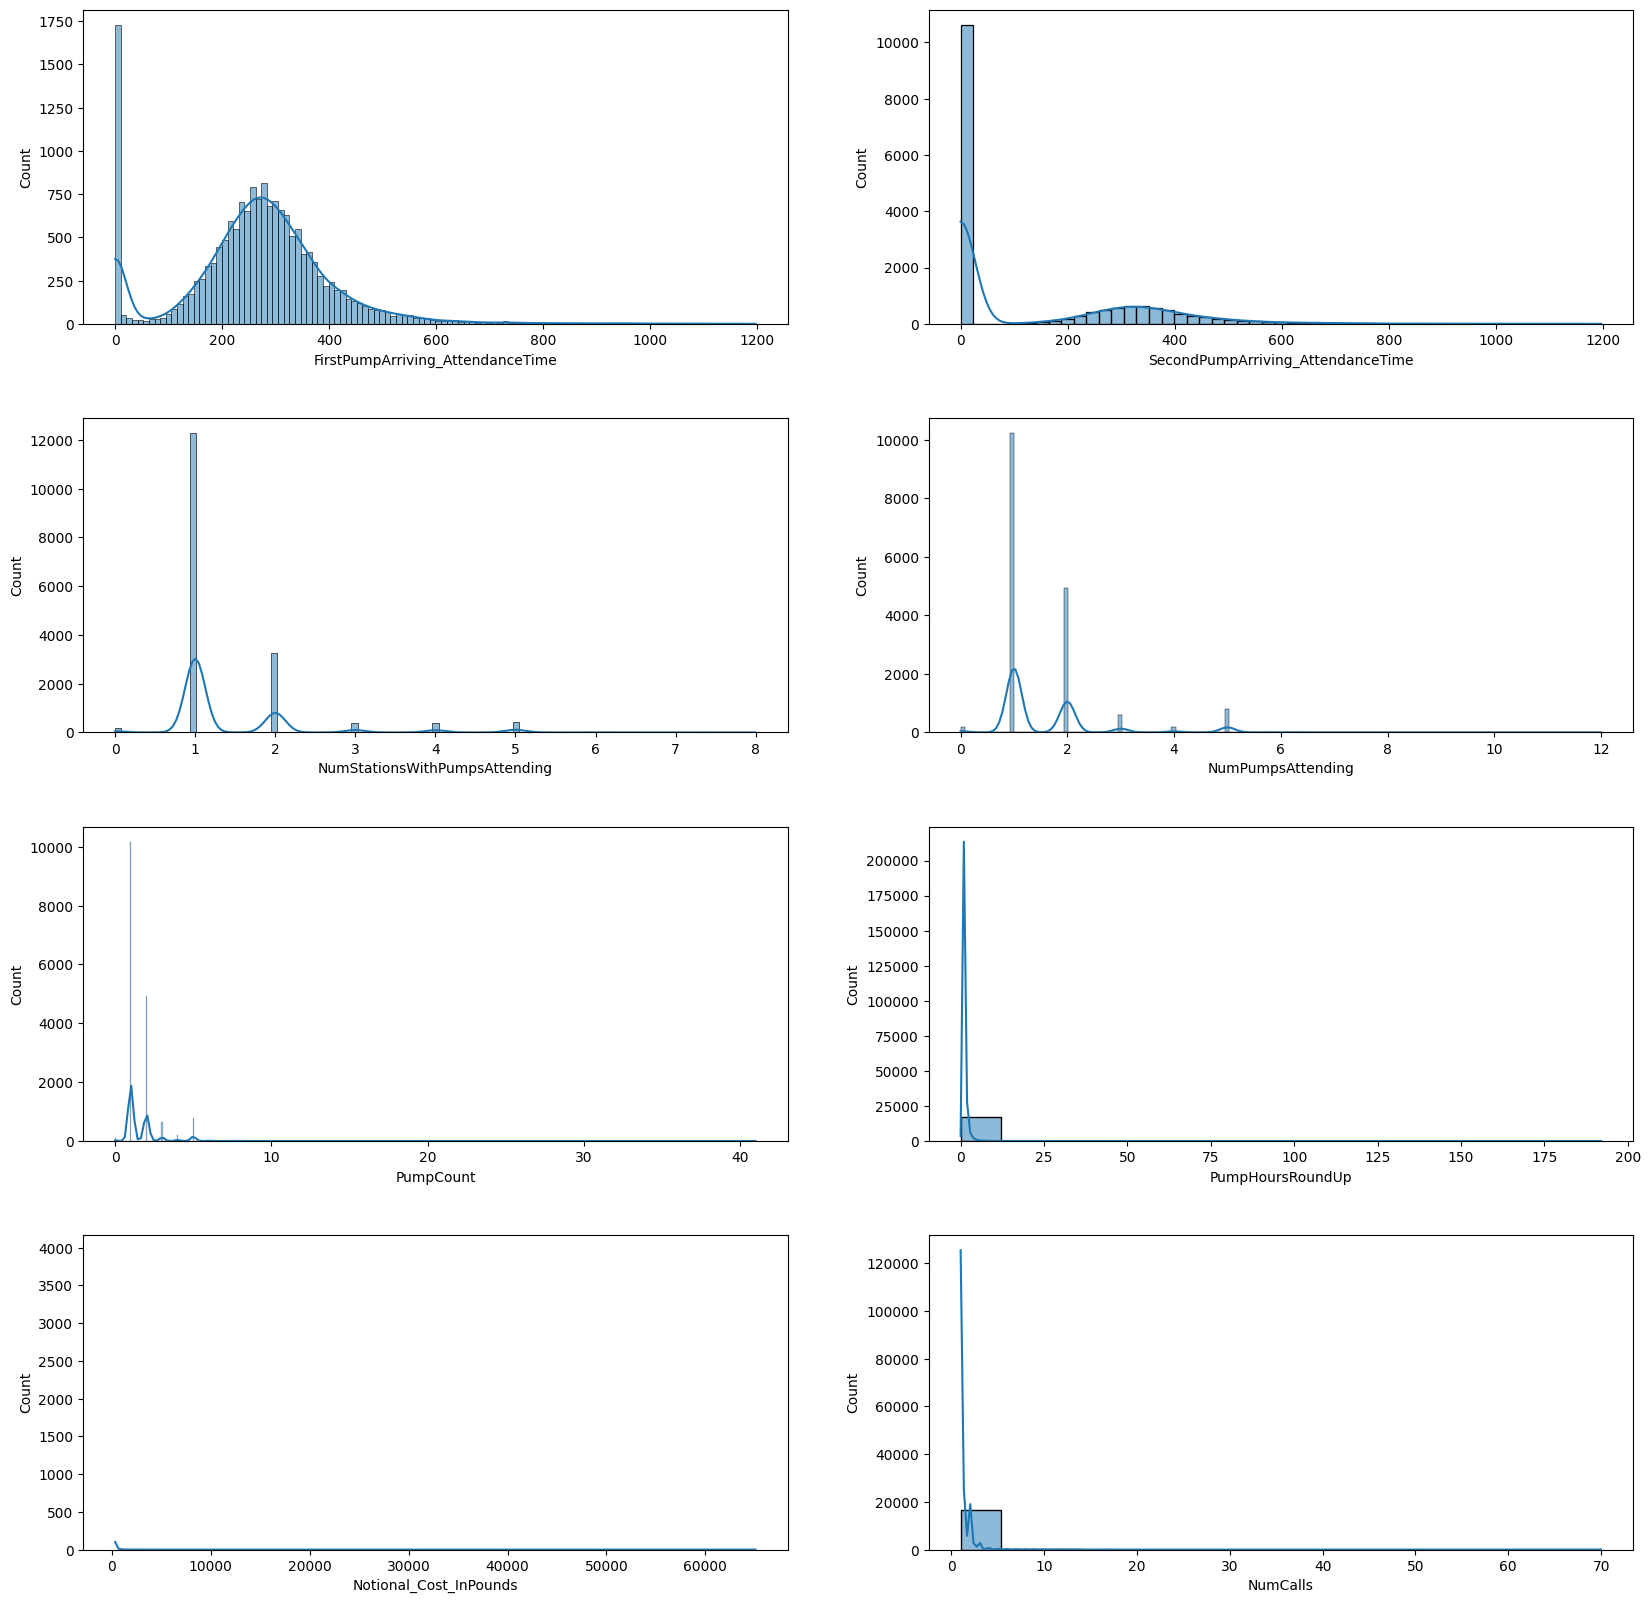

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
axes = axes.flatten()

for i, col in enumerate(stat_columns.columns):
    sns.histplot(data=stat_columns, x=col, ax=axes[i], kde=True)

plt.subplots_adjust(hspace=0.3)
plt.show()

It can be observed from the diagrams above that all of attributes in the "stat_columns" are positively skewed and have long right tails since, if the majority of the extreme values is higher than the mean, the skewness will be positive because they increase the mean (Tuychiev, 2023)

### **6.1.2. Get statistics for all categorical variables only**

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
IncidentNumber,16953,16953,000269-01012019,1
DateOfCall,16953,1430,17 Aug 2022,50
TimeOfCall,16953,15271,15:26:37,5
HourOfCall,16953,24,18,1061
IncidentGroup,16953,3,False Alarm,7416
StopCodeDescription,16953,9,Special Service,7330
SpecialServiceType,7411,19,Effecting entry/exit,1879
PropertyCategory,16953,8,Dwelling,11620
PropertyType,16953,200,Purpose Built Flats/Maisonettes - 4 to 9 storeys,5465
AddressQualifier,16953,11,Correct incident location,9940


This table actually provides more intiutive and complete statistics. Under the "count" columns, some values are lower than 16953 which is the total number of instance in the assigned dataset, and that indicates there are missing or empty values.

## **6.2. Identifying data quality issues**

Checking for missing values in the dataset

In [ ]:
# In the dataset, -1 signifies missing values so i will replace that with NAN  (Not a Number)  so i can use the isnull() function
df.replace(-1, np.nan, inplace=True) # for numerical columns
df.replace("-1", np.nan, inplace=True) # for categorical columns
df.isnull().sum().sort_values(ascending=False)

Postcode_full                             11656
Northing_m                                11656
Latitude                                  11656
Longitude                                 11656
Easting_m                                 11656
SecondPumpArriving_DeployedFromStation    10611
SpecialServiceType                         9542
FirstPumpArriving_DeployedFromStation      1644
Notional_Cost_InPounds                      116
IncGeo_WardName                               1
IncGeo_WardNameNew                            1
IncGeo_WardCode                               1
PumpHoursRoundUp                              0
Easting_rounded                               0
Northing_rounded                              0
NumPumpsAttending                             0
FRS                                           0
NumStationsWithPumpsAttending                 0
FirstPumpArriving_AttendanceTime              0
PumpCount                                     0
SecondPumpArriving_AttendanceTime       

The df.isnull().sum() is to count missing values in each column. Specific to this dataset, -1 represents a missing value or out of range data where all the "-1" with "NaN" (Not a Number) so the isnull() function can be used to count them. From the result, the columns: **Postcode_full, Northing_m, Latitude, Longitude, Easting_m, SecondPumpArriving_DeployedFromStation, SpecialServiceType, FirstPumpArriving_DeployedFromStation, Notional_Cost_InPounds** contain some missing or out of range values and the **IncGeo_WardName, IncGeo_WardNameNew, and IncGeo_WardCode** have only one missing or out of range value, this will be addressed in the data preparation/preprocessing section.

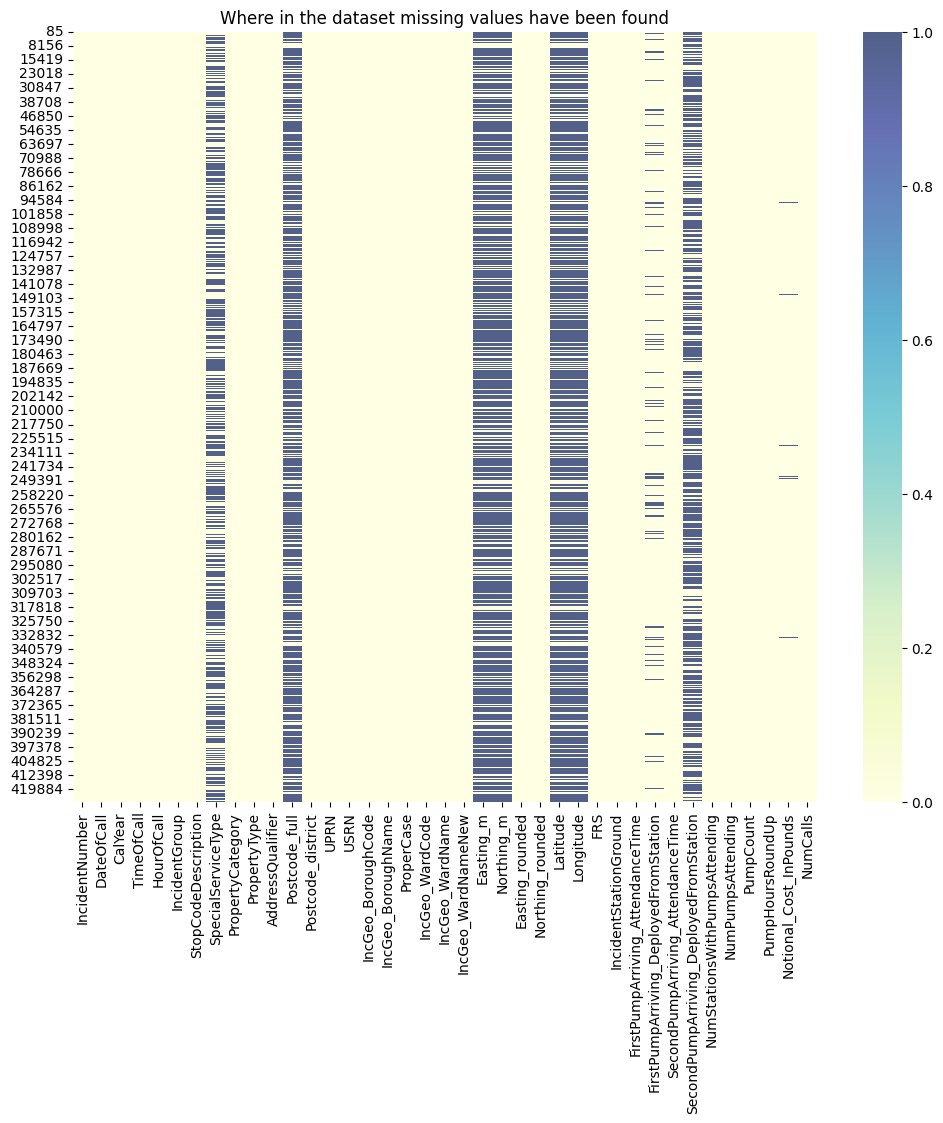

In [ ]:
plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(df.isna(), cmap='YlGnBu', alpha=0.7)
plt.title('Where in the dataset missing values have been found')
plt.show()

The graph above confirms all the instances of the missing values in the mentioned attributes.

### **6.2.1. Outliers and extreme values**

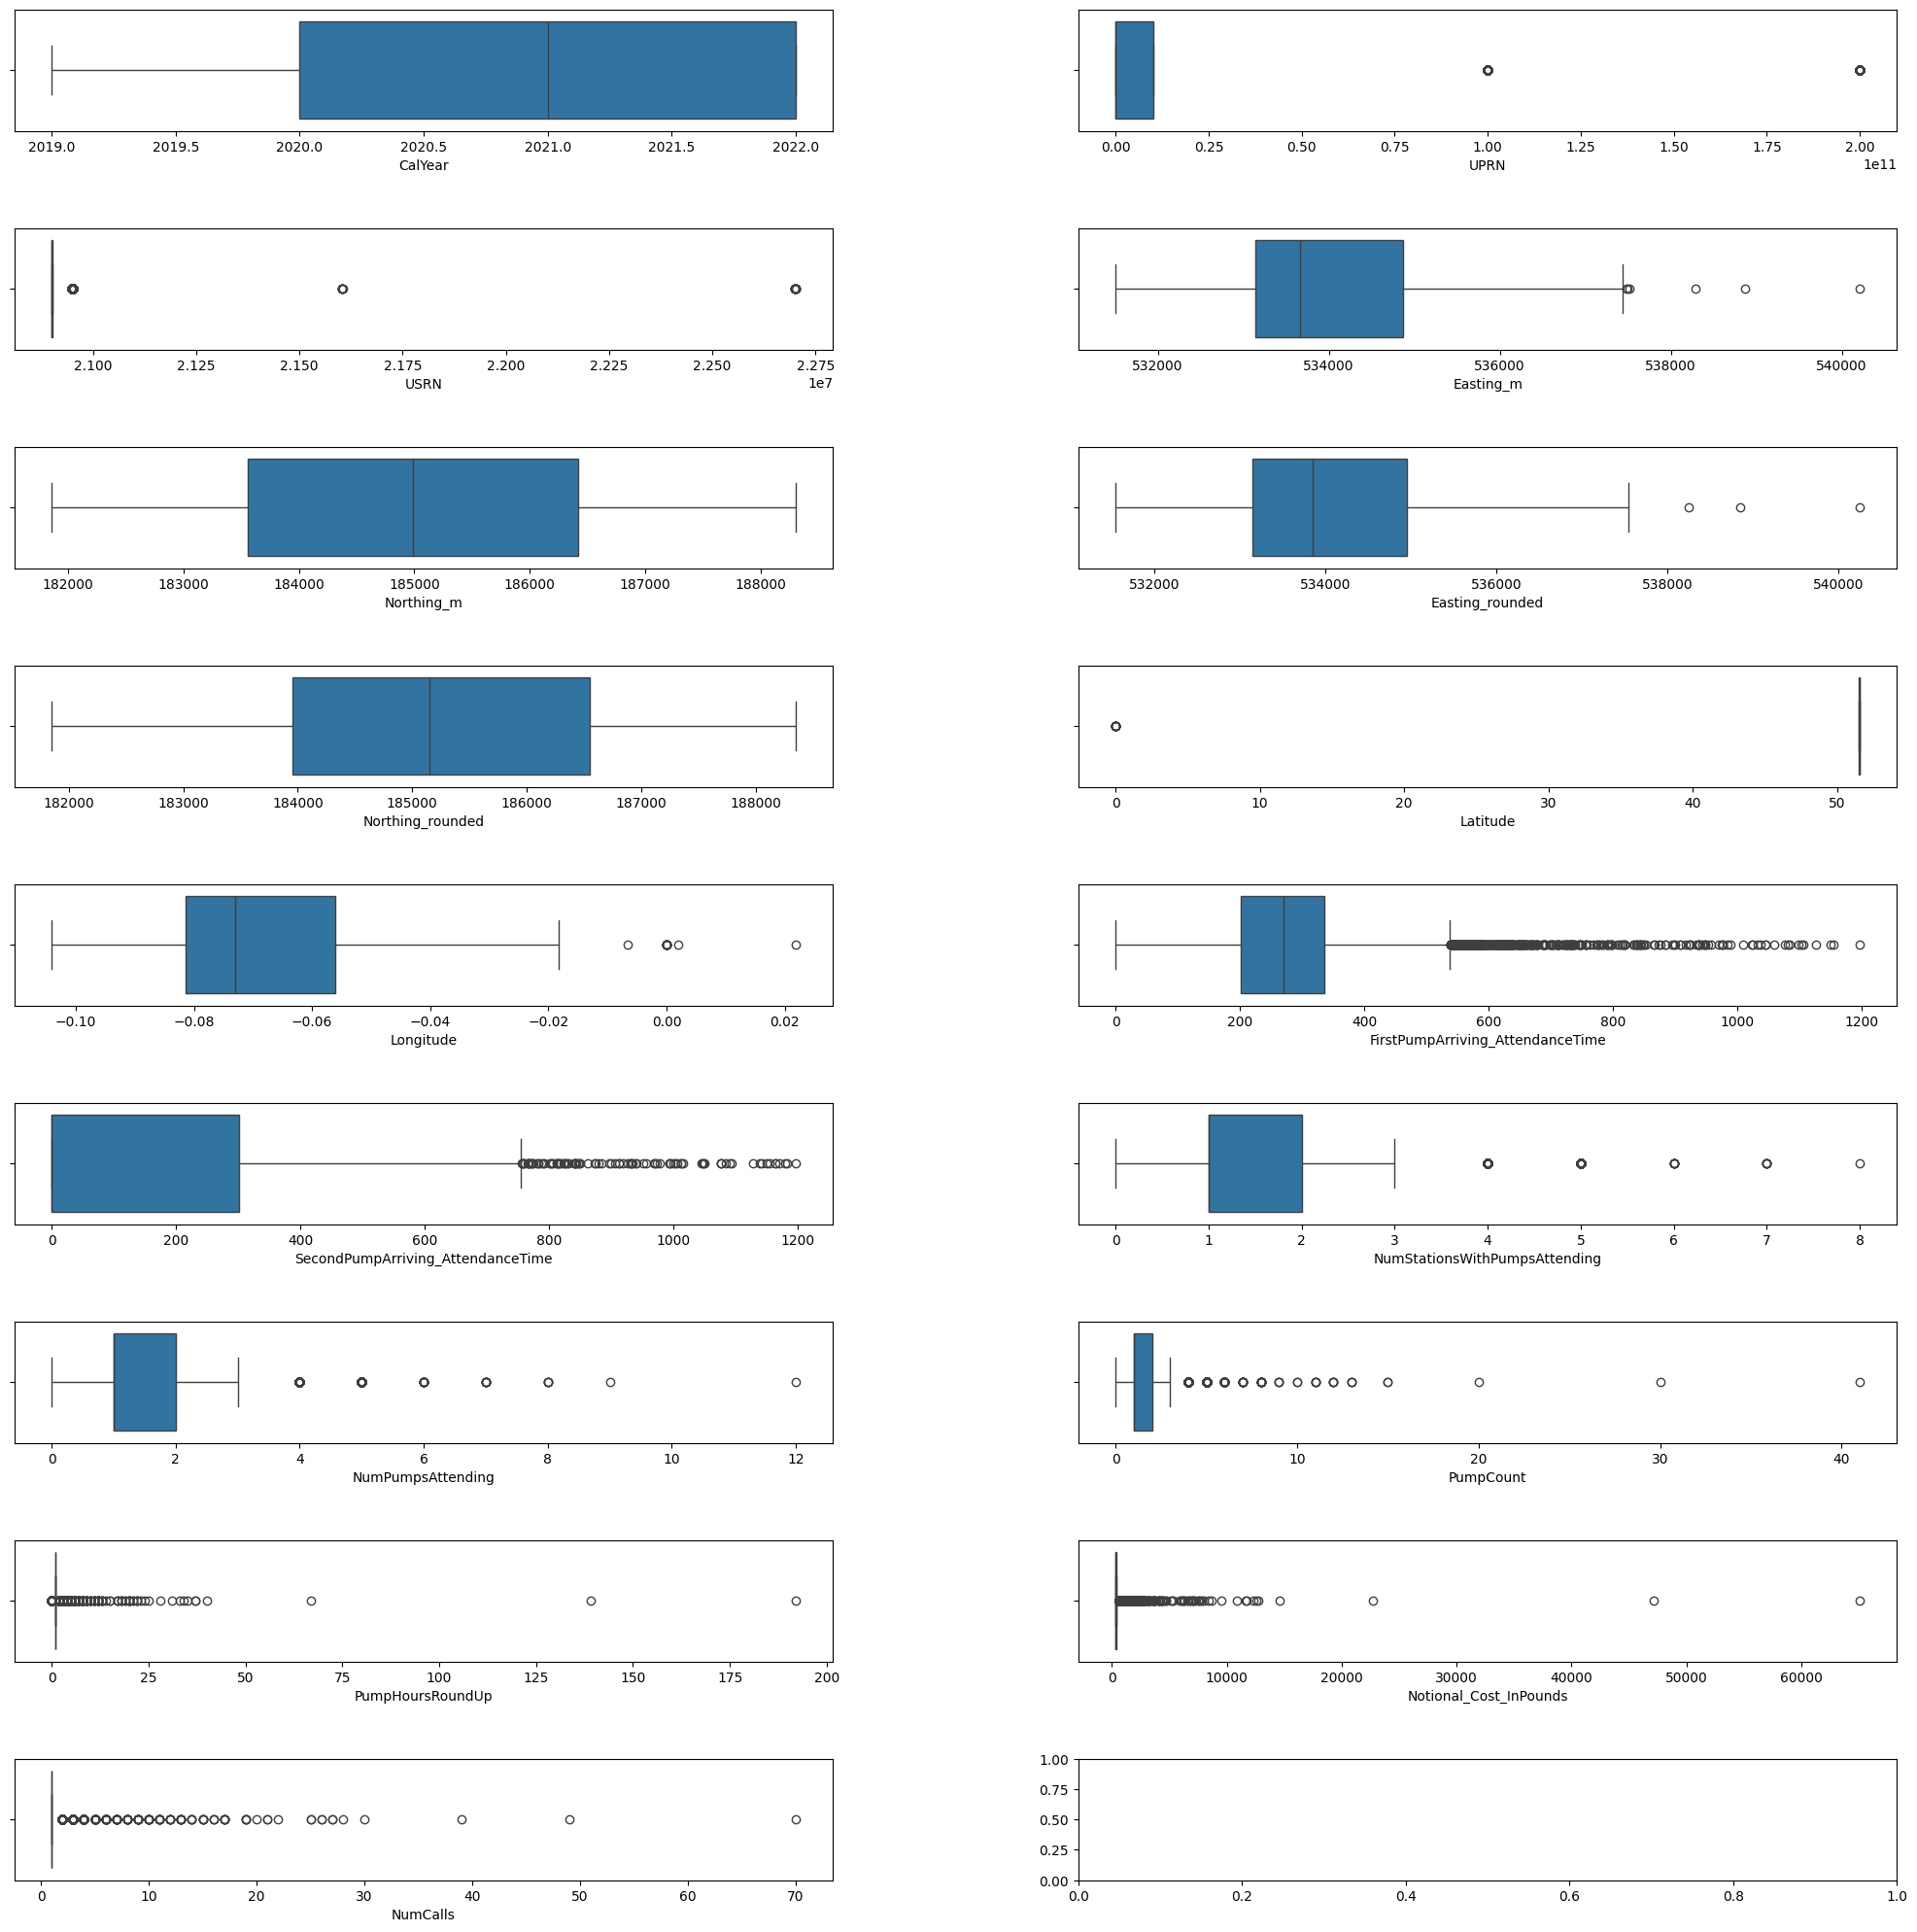

In [ ]:
# Using box plox to determine outliers in numerical columns
numeric_columns = df.select_dtypes(include=np.number).columns
fig, axes = plt.subplots(9, 2, figsize=(25, 25))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
plt.subplots_adjust(wspace=0.3, hspace=0.8)
plt.show()

From the graph above, it can be seen that the column with the most outliers/extreme values is the **FirstPumpArriving_AttendanceTime** column where outliers can be detected after 550 whereas the majority of the values are between 200 and 400. The **SecondPumpArriving_AttendanceTime** has the second most outliers which are all placed after 700.

The **PumpHoursRoundUp** and **Notional_Cost_InPounds** also have similar diverse values which can be reasonable since the cost is calculated by the total number of hours the pumps operated on sites. Other outliers and extreme values can be found in much smaller numbers in attributes: **NumStationsWithPumpsAttending, NumPumpsAttending, PumpCount, NumCalls**.

### **6.2.2. The categorical attributes can depict the outliers with barcharts (histograms)**

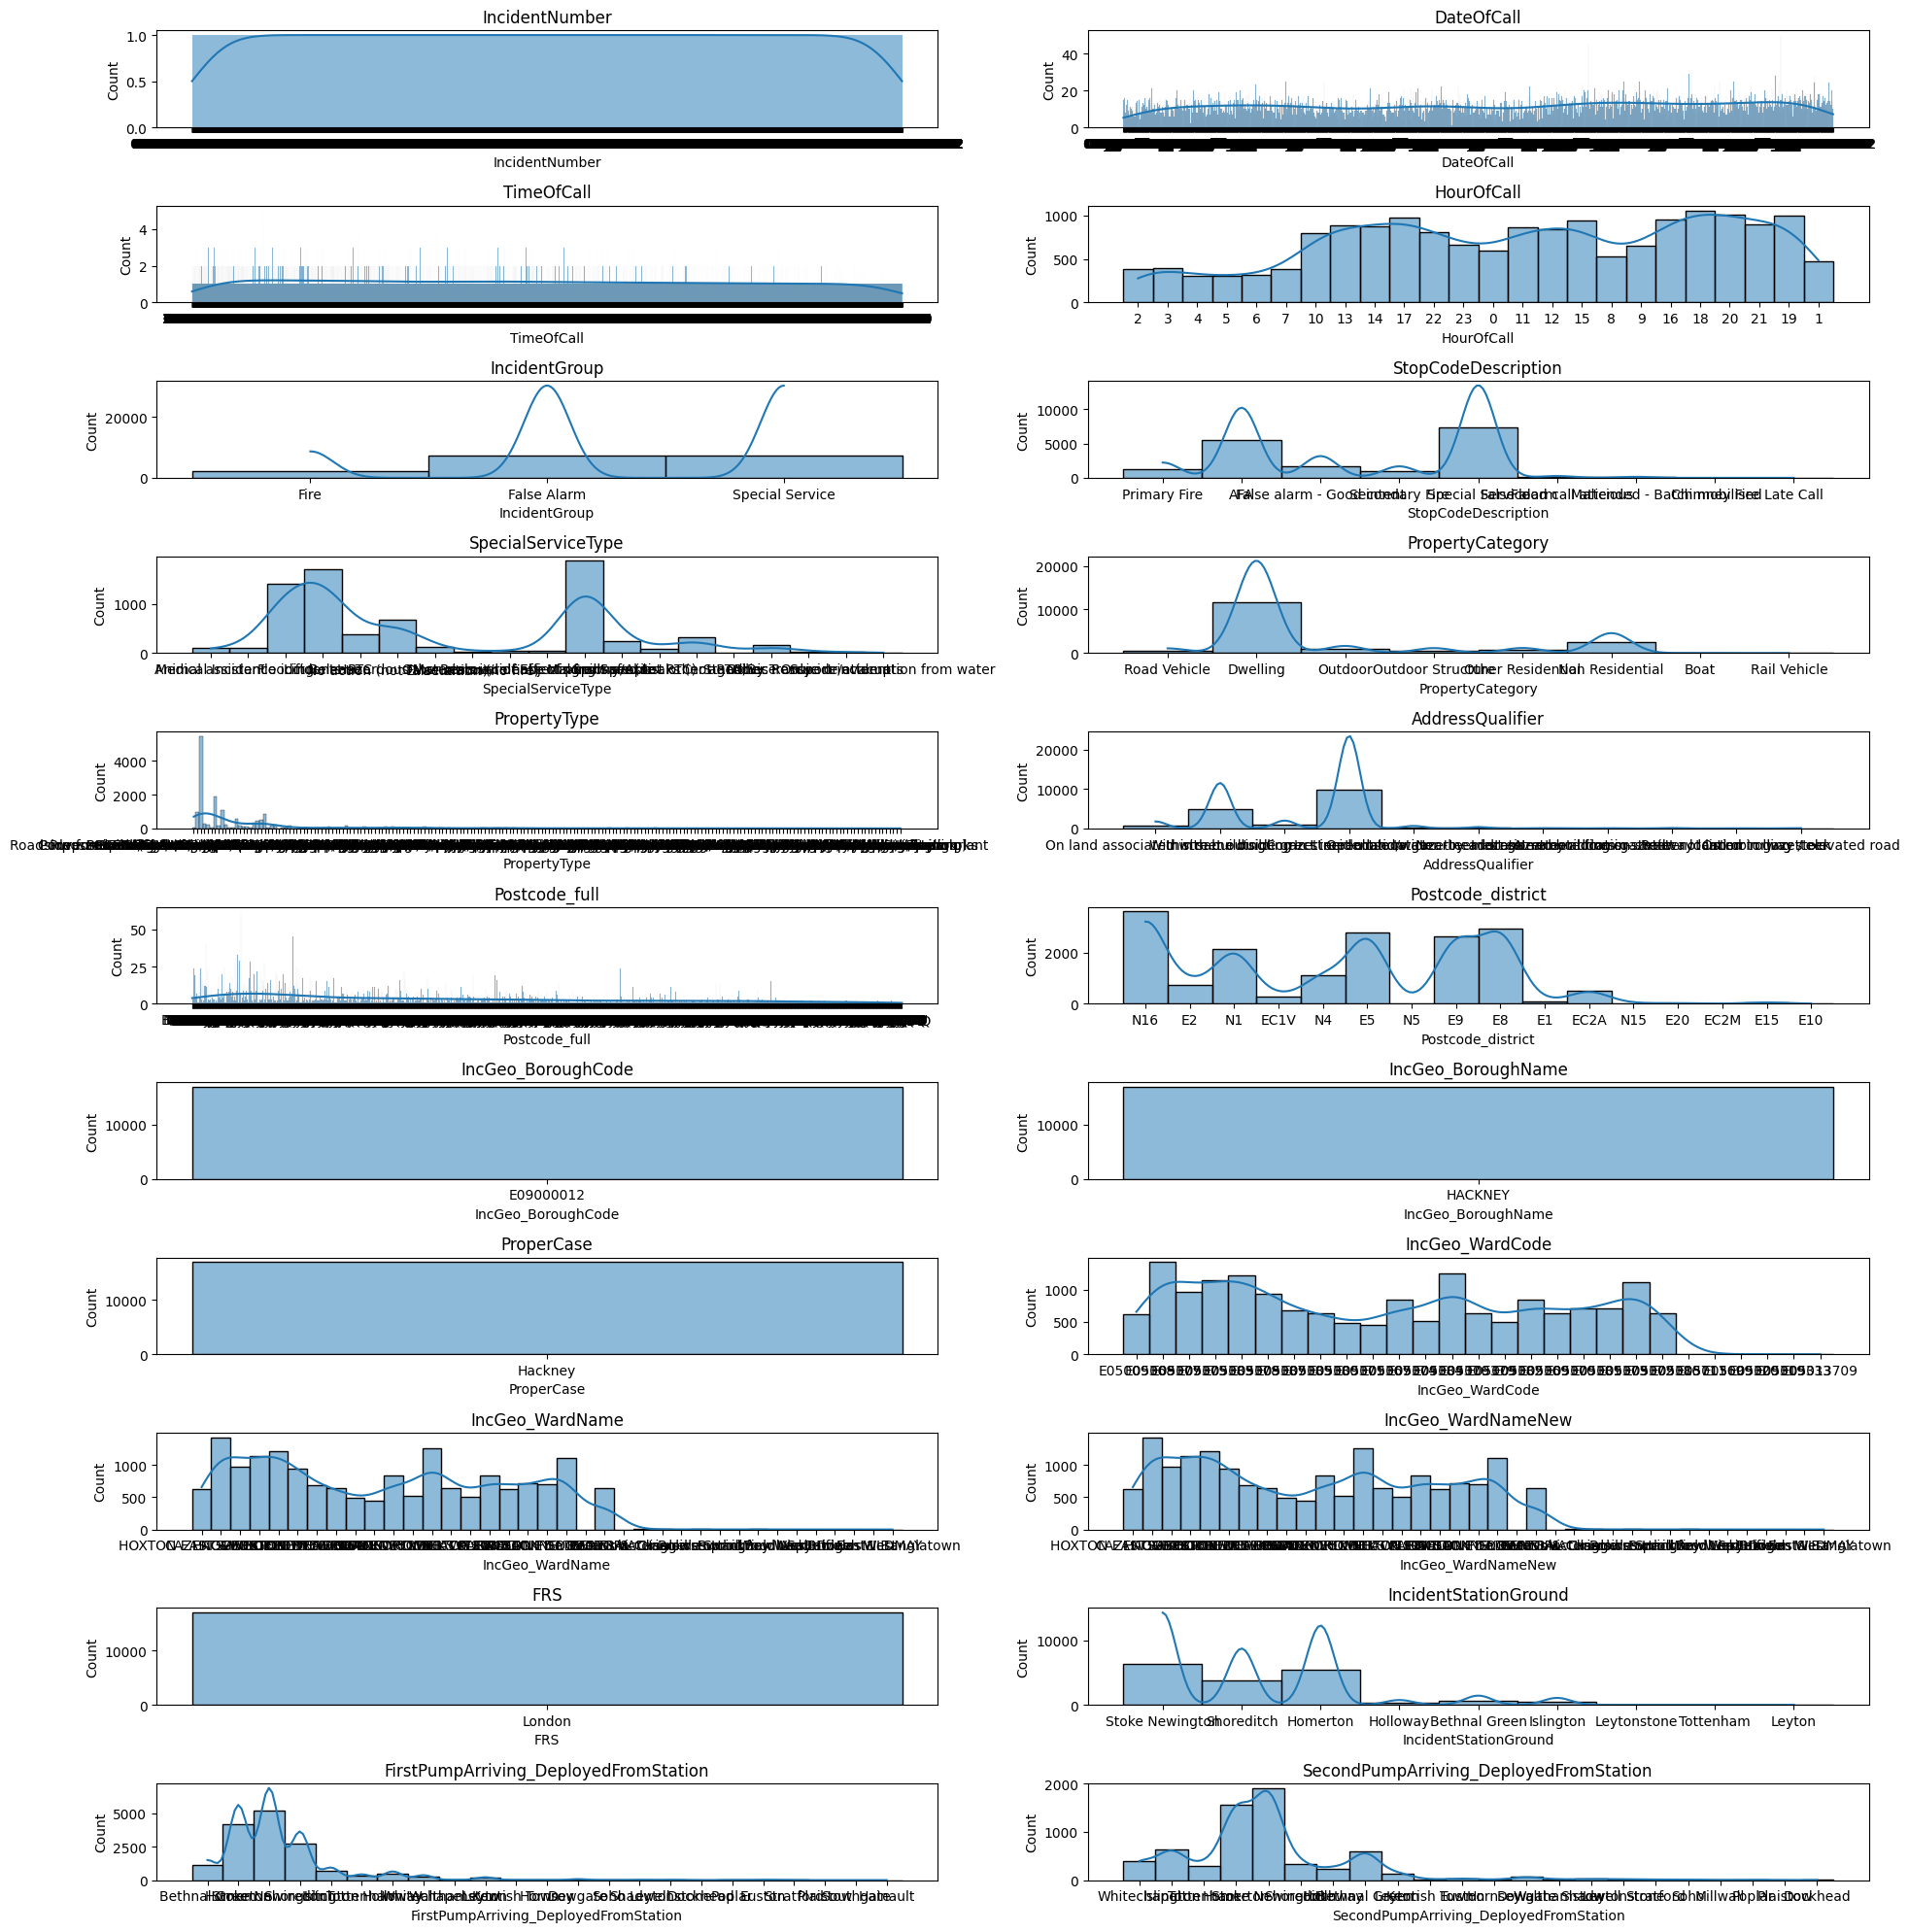

In [ ]:
# Create bar chart for each categorical column
fig = plt.figure(figsize=(20, 20))

# Selecting only categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Get the number of columns to plot (excluding excluded columns)
columns_to_plot = [column for column in categorical_columns]
num_columns = len(columns_to_plot)

for i, column in enumerate(columns_to_plot):
    sub = fig.add_subplot(11, 2, i + 1)
    chart = sns.histplot(data=df, x=column, kde=True)
    chart.set_title(column)

plt.tight_layout()
plt.show()

From the bar charts above, it appears that most categorical attributes (16 out of 22) does not have any outliers. According to Yugesh (2022), categorical attributes does not have outliers in the traditional sense because they consists of lables that represent different groups, not unique as found in numerical data. However, the following six columns (**PropertyCategory, PropertyType, AddressQualifier, IncidentStationGround, FirstPumpArriving_DeployedFromStation, SecondPumpArriving_DeployedFromStation**) show they have some outliers/extreme values which may be due to the class imbalances in the columns that will be explored more in the next subsection.

Additionally, the histograms show that **IncidentNumber, InGeo_BoroughCode, InGeo_BoroughName, ProperCase, FRS** attributes have only constant values, which will be eventaully discarded under data preprocessing.

An interesting insight is the similarity charts between **IncGeo_WardName** and **IncGeo_WardNameNew**. This means that they are duplicates that can be expected from the attribute names as well and the related charts confirms this assumption but we can confirm this assumption with the code below which checks if all the elements in the both columns are the same:

In [ ]:
print('The elements in both IncGeo_WardName and IncGeo_WardNameNew are the same: ', df['IncGeo_WardName'].equals(df['IncGeo_WardNameNew']))

The elements in both IncGeo_WardName and IncGeo_WardNameNew are the same:  True


### **6.2.3. Detecting imbalanced classes in categorical attributes**

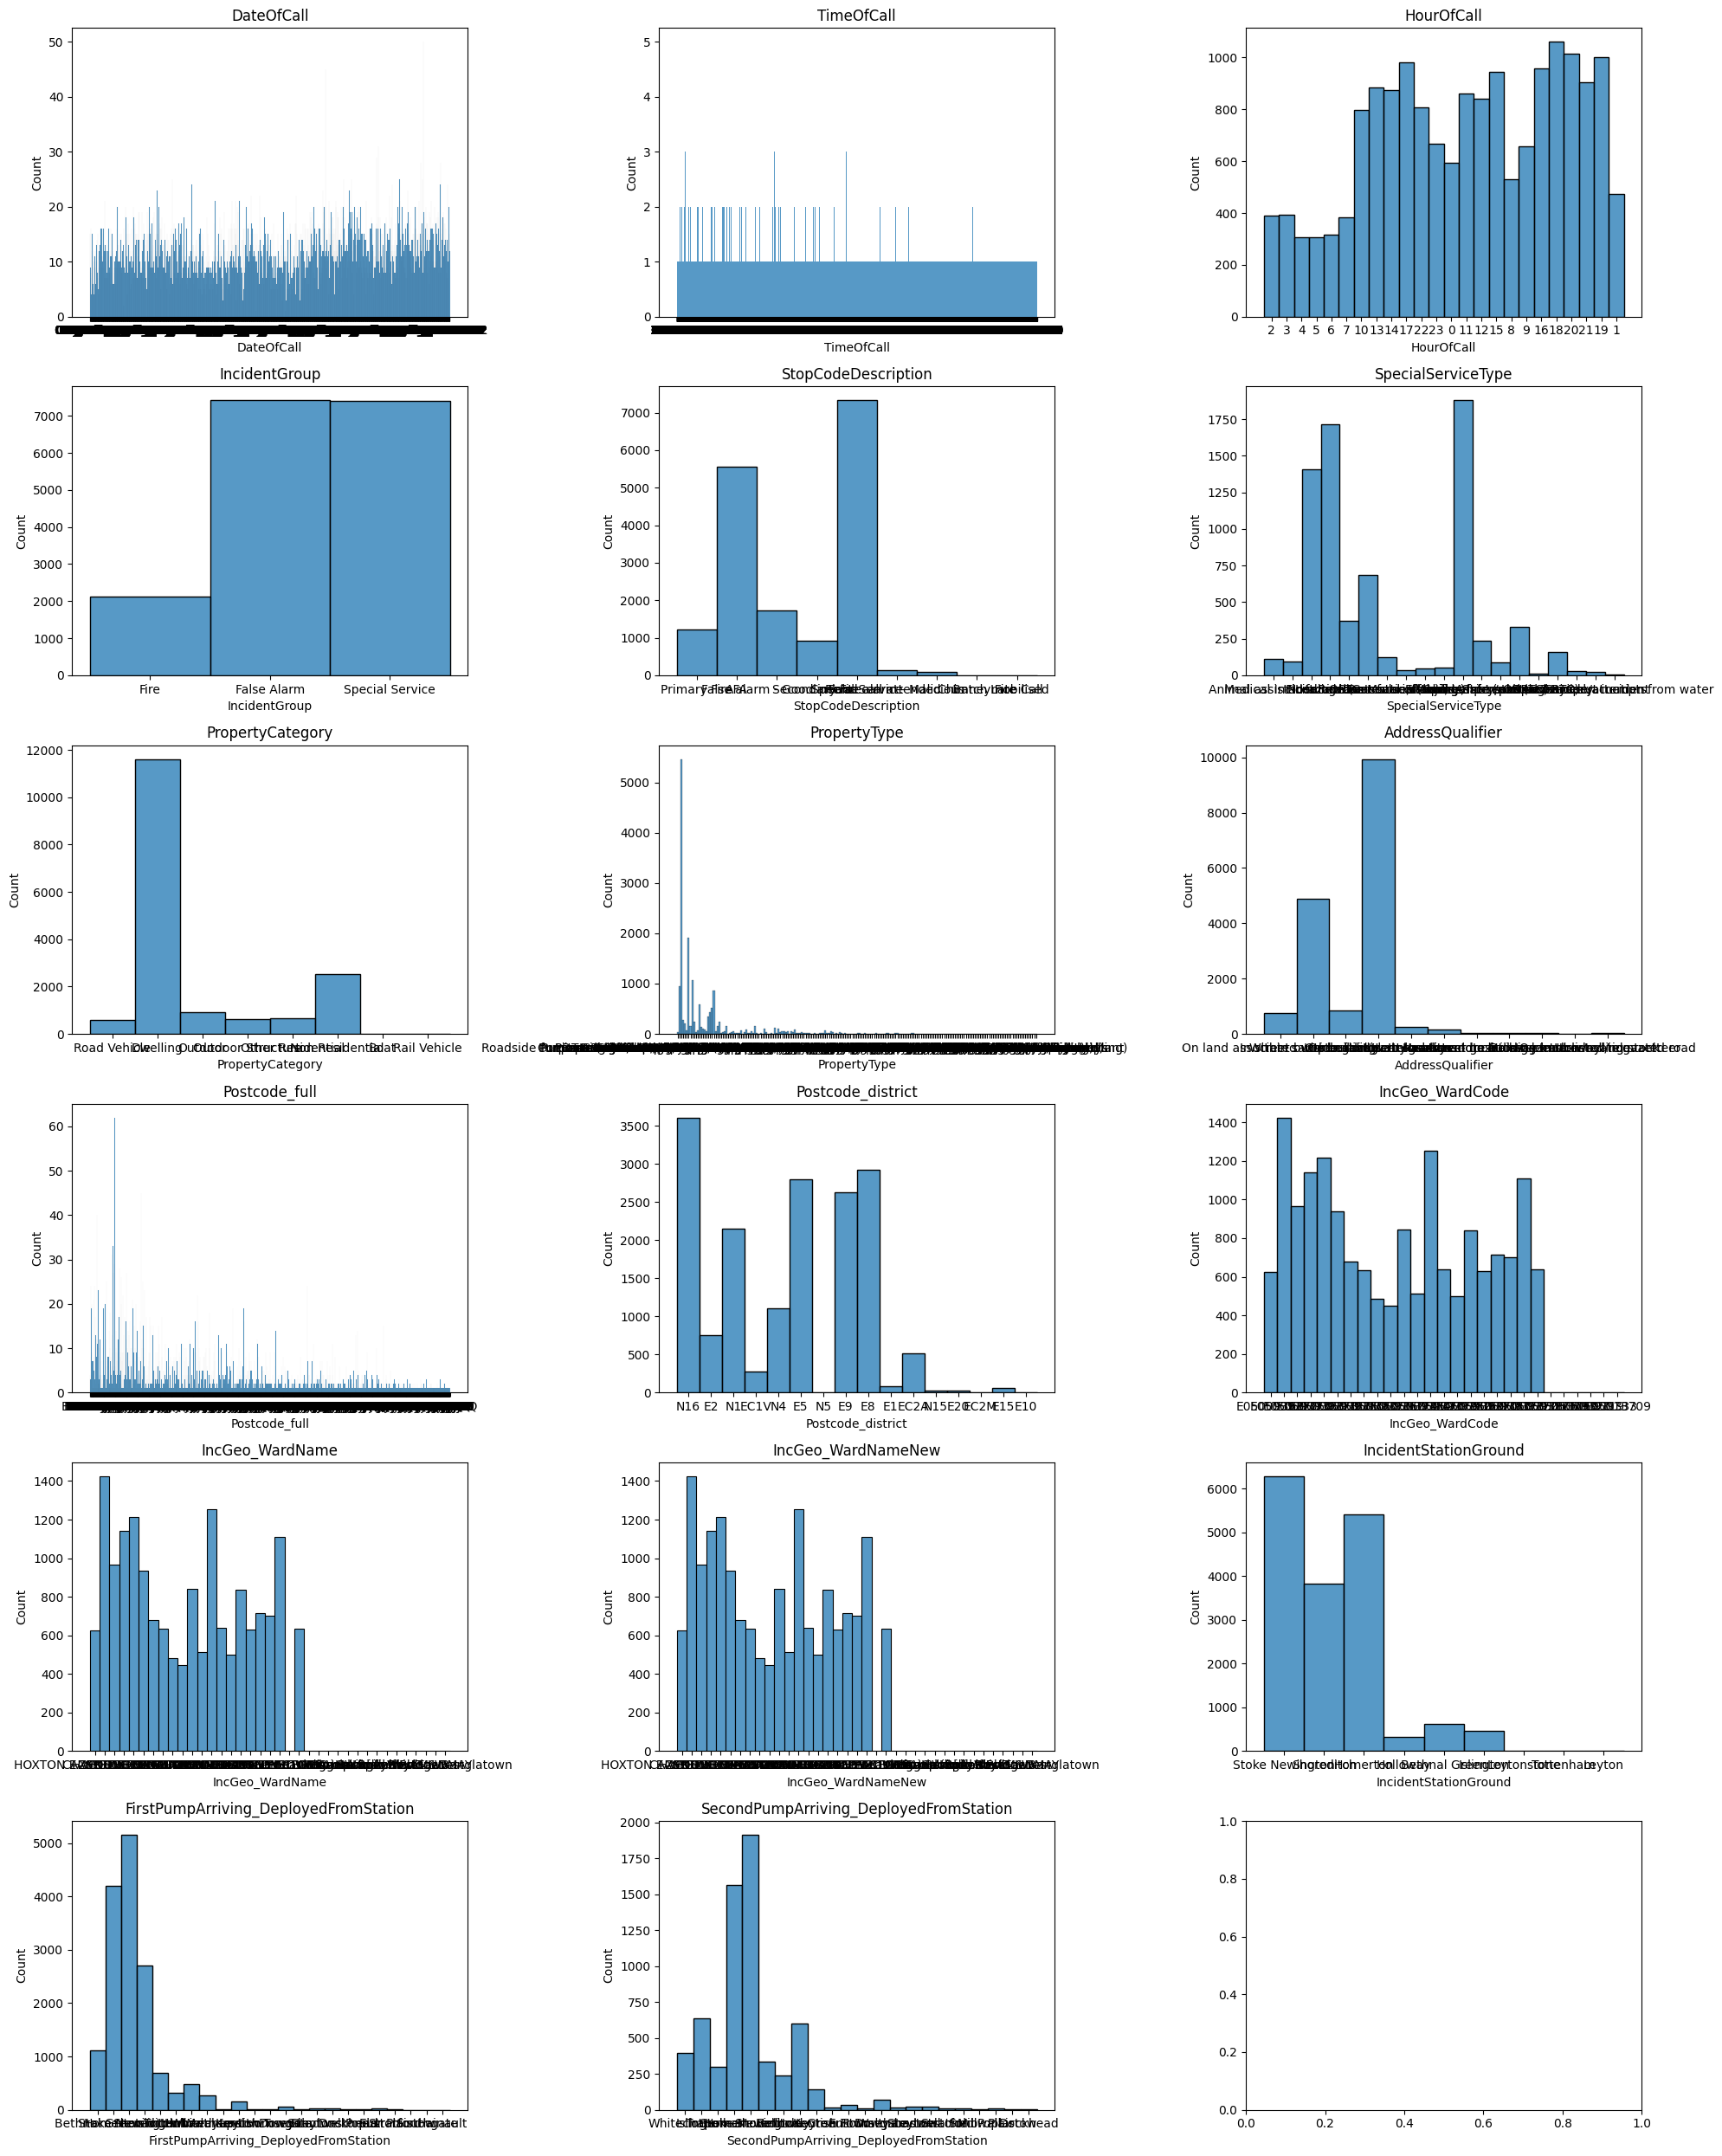

In [ ]:
import math

columns_to_exclude = ['IncidentNumber', 'IncGeo_BoroughCode', 'IncGeo_BoroughName', 'ProperCase', 'FRS']

# Filter out only categorical columns excluding the specified ones
cols_to_plot = [col for col in df.select_dtypes(include=['object']).columns if col not in columns_to_exclude]

# Calculate number of rows and columns needed based on the number of categorical columns
num_cols = 3
num_rows = math.ceil(len(cols_to_plot) / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 25))
axes = axes.flatten()
# Loop through each categorical column and create a pie chart
for idx, column in enumerate(cols_to_plot):
    # sub = fig.add_subplot(11, 2, )
    chart = sns.histplot(data=df, x=column, ax=axes[idx])
    chart.set_title(column)

plt.tight_layout()
plt.show()

From the bar graphs above, it can be detected that labels of the attributes, **StopCodeDescription, SpecialServiceType, PropertyCategory, PropertyType, AddressQualifier, Postcode_full, FirstPumpArriving_DeployedFromStation, SecondPumpArriving_DeployedFromStation** are likely imbalanced.
Each of them can be examined more precisely in numbers to confirm their imbalances:

In [ ]:
df['StopCodeDescription'].value_counts()

Special Service                          7330
AFA                                      5550
False alarm - Good intent                1722
Primary Fire                             1210
Secondary Fire                            912
False alarm - Malicious                   144
Flood call attended - Batch mobilised      81
Chimney Fire                                2
Late Call                                   2
Name: StopCodeDescription, dtype: int64

The **StopCodeDescription** looks moderately balanced although the last two labels each has only 2 instances.


In [ ]:
df['SpecialServiceType'].value_counts()

Effecting entry/exit               1879
Lift Release                       1717
Flooding                           1405
No action (not false alarm)         683
RTC                                 374
Assist other agencies               329
Making Safe (not RTC)               238
Advice Only                         160
Hazardous Materials incident        122
Medical Incident                    111
Animal assistance incidents          97
Spills and Leaks (not RTC)           91
Removal of objects from people       55
Other rescue/release of persons      47
Evacuation (no fire)                 33
Other Transport incident             29
Suicide/attempts                     25
Stand By                              9
Rescue or evacuation from water       7
Name: SpecialServiceType, dtype: int64

The **SpeacialServiceType** can be counted as a balanced class since the adjecent labels are not too far from each other.

In [ ]:
df['PropertyCategory'].value_counts()

Dwelling             11620
Non Residential       2518
Outdoor                904
Other Residential      648
Outdoor Structure      632
Road Vehicle           600
Boat                    21
Rail Vehicle            10
Name: PropertyCategory, dtype: int64

The **PropertyCategory** is an **imbalanced class** since difference between the second label value and the first one is four times of the second value.

In [ ]:
df['PropertyType'].value_counts()

Purpose Built Flats/Maisonettes - 4 to 9 storeys         5465
Purpose Built Flats/Maisonettes - Up to 3 storeys        1916
House - single occupancy                                 1071
Converted Flat/Maisonettes - 3 or more storeys            953
Purpose Built Flats/Maisonettes - 10 or more storeys      870
                                                         ... 
Recycling collection point/ bottle bank                     1
Standing crop                                               1
Manufacturing assembly plant                                1
Beach                                                       1
Freight Train                                               1
Name: PropertyType, Length: 200, dtype: int64

The **PropertyType** is also an imbalanced class because each value and its adjecent one is far from each other, and there are also big difference between the top 5 and bottom 5 labels.

In [ ]:
df['AddressQualifier'].value_counts()

Correct incident location                          9940
Within same building                               4878
In street outside gazetteer location                838
On land associated with building                    745
In street close to gazetteer location               263
Open land/water - nearest gazetteer location        145
Nearby address - street not listed in gazetteer      44
Nearby address - no building in street               31
On motorway / elevated road                          28
In street remote from gazetteer location             26
Railway land or rolling stock                        15
Name: AddressQualifier, dtype: int64

This **AddressQualifier** attribute is a bit hard to decide if it is balanced or imbalanced. Considering the large difference between the top labels and the bottom labels, it can be counted as an **imbalanced class**.

In [ ]:
df['Postcode_full'].value_counts()

EC1V 9EY    62
E9 6SR      45
E8 1LL      40
N4 1BX      33
N1 5JU      31
            ..
E9 6EL       1
E5 8EH       1
EC2A 4NA     1
N1 6LQ       1
E9 7BH       1
Name: Postcode_full, Length: 1695, dtype: int64

The **Postcode_full** is a balanced class since the values are well distributed.

In [ ]:
df['FirstPumpArriving_DeployedFromStation'].value_counts()

Stoke Newington    5158
Homerton           4204
Shoreditch         2710
Bethnal Green      1111
Islington           694
Holloway            485
Tottenham           319
Whitechapel         274
Leyton              159
Dowgate              56
Euston               21
Shadwell             20
Leytonstone          19
Walthamstow          16
Kentish Town         13
Poplar               13
Soho                 13
Hornsey               9
Stratford             7
Dockhead              5
Plaistow              1
Southgate             1
Hainault              1
Name: FirstPumpArriving_DeployedFromStation, dtype: int64

This **FirstPumpArriving_DeployedFromStation** is an **imbalanced class** since few attributes make up a large postion of the values.

In [ ]:
df['SecondPumpArriving_DeployedFromStation'].value_counts()

Stoke Newington    1915
Homerton           1566
Islington           636
Bethnal Green       598
Whitechapel         394
Shoreditch          333
Tottenham           300
Holloway            241
Leyton              140
Dowgate              67
Euston               33
Shadwell             23
Leytonstone          19
Walthamstow          16
Kentish Town         14
Soho                 12
Stratford            12
Hornsey               9
Poplar                7
Dockhead              4
Millwall              2
Plaistow              1
Name: SecondPumpArriving_DeployedFromStation, dtype: int64

This **SecondPumpArriving_DeployedFromStation** is similar to the FirstPumpArriving_DeployedFromStation in numbers, so it is also an **imbalanced class**.

## **6.3. Determining if the dataset is appropriate for addressing business problems**

1. **How time of a day and a year (season) affect which type of properties are calling most for fire hazards?**
 - This business question deals with time in a day (**HourOfCall**) and year (**DateOfCall**) from the dataset to categorize the time and season as well as the type of the property (**PropertyCategory**) the calls are coming from to relate to the time. From the dataset, we can witness all the columns mentioned above does not have any missing values but have **outliers/extereme values** so these need to be delt with in the preprocessing.



2. **Does incident triggers cause any difference in how fast the first pump arrives?**
 - To find meaningful answers for this business problem, the columns, **IncidentGroup** for identifying incident triggers and **FirstPumpArriving_AttendanceTime** for how fast the first pump arrives after a call. From the analysis above, it can be seen that the columns have **missing values and outliers** which can be addressed in the next section.



3. **Which wards in Hackney have most fires and costed the most from pump deployments?**
  - To identify the wards with most number of fires and highest costs, we will use all the instances of the fire call in Hackey with the columns **IncGeo_WardName** and **Notional_Cost_InPounds** which both have some **outliers and missing values**.

4. **Find out which postcode district the fire calls coming from and what seasons are most likely to be classified as false alarms?**
  - The likelihood of future calls being classified as false alarms can be found with the columns **IncidentGroup**, **Postcode_district**, and construction of a new column "Season" from **DateOfCall** that do not have any missing values and their data is balanced, so no outliers.

5. **Is the time from the call to the first pump deployment reducing year by year?**
  - To identify the improvement in the first response from the call to the first pump arriving in the place, we will utilise the columns **CalYear** and **FirstPumpArriving_AttendanceTime**. The **data in the latter column have some extreme values** that can be addressed in the preprocessing.

The report will try to answer the questions 1 and 4 through modelling but will do pre-processing for the question 5 as well to experiment with related attributes.

# **7. Data Preprocessing**

This section deals with the data preprocessing, which includes dealing with missing values, outliers, data inconsistencies and imbalanced classes identified in data understanding, dimentionality reduction, and conducting data transformation and normalisation. In the end, the whole dataset will be divided into subsets to be used for training, test and validation of selected modelling (predictive modelling: Decision Tree, Regression. Or Descriptive modelling: K-Means Clustering, Association Analysis.)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16953 entries, 85 to 426441
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IncidentNumber                          16953 non-null  object 
 1   DateOfCall                              16953 non-null  object 
 2   CalYear                                 16953 non-null  int64  
 3   TimeOfCall                              16953 non-null  object 
 4   HourOfCall                              16953 non-null  object 
 5   IncidentGroup                           16953 non-null  object 
 6   StopCodeDescription                     16953 non-null  object 
 7   SpecialServiceType                      7411 non-null   object 
 8   PropertyCategory                        16953 non-null  object 
 9   PropertyType                            16953 non-null  object 
 10  AddressQualifier                        16953 non-null  

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Postcode_full                             11656
Northing_m                                11656
Latitude                                  11656
Longitude                                 11656
Easting_m                                 11656
SecondPumpArriving_DeployedFromStation    10611
SpecialServiceType                         9542
FirstPumpArriving_DeployedFromStation      1644
Notional_Cost_InPounds                      116
IncGeo_WardName                               1
IncGeo_WardNameNew                            1
IncGeo_WardCode                               1
PumpHoursRoundUp                              0
Easting_rounded                               0
Northing_rounded                              0
NumPumpsAttending                             0
FRS                                           0
NumStationsWithPumpsAttending                 0
FirstPumpArriving_AttendanceTime              0
PumpCount                                     0
SecondPumpArriving_AttendanceTime       

## **7.1. Remove the constant and redundant attributes from the dataset**

The Data Understanding revealed that the columns  "IncidentNumber, IncGeo_BoroughCode, IncGeo_BoroughName, ProperCase, FRS" have constant values that add no value to the modelling. Additionally, we will not need the columns "SpecialServiceType, Postcode_full, IncGeo_WardNameNew, SecondPumpArriving_AttendanceTime, SecondPumpArriving_DeployedFromStation".


In [ ]:
df.drop(['IncidentNumber', 'SpecialServiceType', 'Postcode_full', 'IncGeo_BoroughCode', 'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardNameNew', 'FRS', 'SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation'], axis=1, inplace=True)

Since any attributes with the too many missing values (more than 20%) can be thrown away because they are not suitable for a target attribute (Chen, 2024), we also need to drop the columns **Easting_m, Northing_m, Longitude, Latitude** because they each has 11656 null instances which means more than 65% of the all the values are missing.

In [ ]:
df.drop(['Easting_m', 'Northing_m', 'Longitude', 'Latitude'], axis=1, inplace=True)

In [ ]:
# Check if all the columns are now removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16953 entries, 85 to 426441
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   DateOfCall                             16953 non-null  object 
 1   CalYear                                16953 non-null  int64  
 2   TimeOfCall                             16953 non-null  object 
 3   HourOfCall                             16953 non-null  object 
 4   IncidentGroup                          16953 non-null  object 
 5   StopCodeDescription                    16953 non-null  object 
 6   PropertyCategory                       16953 non-null  object 
 7   PropertyType                           16953 non-null  object 
 8   AddressQualifier                       16953 non-null  object 
 9   Postcode_district                      16953 non-null  object 
 10  UPRN                                   16953 non-null  float64
 11  

## **7.2. Dealing with missing values**

In [ ]:
# imputing missing values in categorical attributes with the mode
df['FirstPumpArriving_DeployedFromStation'].fillna(df['FirstPumpArriving_DeployedFromStation'].mode()[0], inplace=True)
df['IncGeo_WardCode'].fillna(df['IncGeo_WardCode'].mode()[0], inplace=True)
df['IncGeo_WardName'].fillna(df['IncGeo_WardName'].mode()[0], inplace=True)

# imputing missing values in numerical attributes with the mean
df['Notional_Cost_InPounds'].fillna(df['Notional_Cost_InPounds'].mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16953 entries, 85 to 426441
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   DateOfCall                             16953 non-null  object 
 1   CalYear                                16953 non-null  int64  
 2   TimeOfCall                             16953 non-null  object 
 3   HourOfCall                             16953 non-null  object 
 4   IncidentGroup                          16953 non-null  object 
 5   StopCodeDescription                    16953 non-null  object 
 6   PropertyCategory                       16953 non-null  object 
 7   PropertyType                           16953 non-null  object 
 8   AddressQualifier                       16953 non-null  object 
 9   Postcode_district                      16953 non-null  object 
 10  UPRN                                   16953 non-null  float64
 11  

In [ ]:
df.isnull().sum().sort_values(ascending=False)

DateOfCall                               0
IncGeo_WardName                          0
Notional_Cost_InPounds                   0
PumpHoursRoundUp                         0
PumpCount                                0
NumPumpsAttending                        0
NumStationsWithPumpsAttending            0
FirstPumpArriving_DeployedFromStation    0
FirstPumpArriving_AttendanceTime         0
IncidentStationGround                    0
Northing_rounded                         0
Easting_rounded                          0
IncGeo_WardCode                          0
CalYear                                  0
USRN                                     0
UPRN                                     0
Postcode_district                        0
AddressQualifier                         0
PropertyType                             0
PropertyCategory                         0
StopCodeDescription                      0
IncidentGroup                            0
HourOfCall                               0
TimeOfCall 

## **7.3. Dealing with outliers in numerical columns**

Instead of addressing outliers in all the columns, only the attributes the business problems are related to can be delt with and this approach will reduce both the time and resources.

The attributes **FirstPumpArriving_AttendanceTime** and **Notional_Cost_InPounds** will be addressed in this subsection and their outliers will be removed.

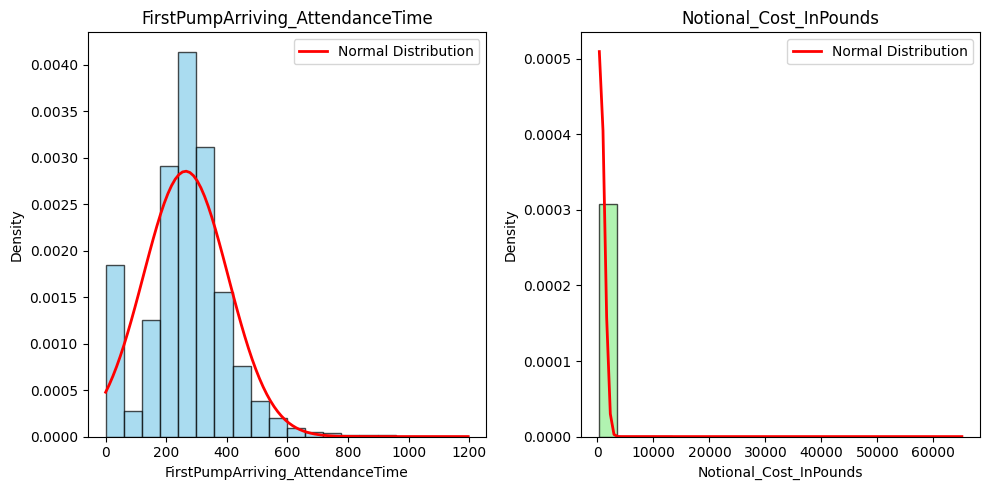

In [ ]:
# Extract data from the dataset
data_fpaat = df['FirstPumpArriving_AttendanceTime']
data_ncip = df['Notional_Cost_InPounds']

# Calculate mean and standard deviation
mean_fpaat = data_fpaat.mean()
std_dev_fpaat = data_fpaat.std()

mean_ncip = data_ncip.mean()
std_dev_ncip = data_ncip.std()

# Create chart for FirstPumpArriving_AttendanceTime
plt.figure(figsize=(10, 5))

# chart for FirstPumpArriving_AttendanceTime
plt.subplot(1, 2, 1)
plt.hist(data_fpaat, bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Overlay normal distribution PDF for FirstPumpArriving_AttendanceTime
x_fpaat = np.linspace(data_fpaat.min(), data_fpaat.max(), 100)
pdf_fpaat = norm.pdf(x_fpaat, mean_fpaat, std_dev_fpaat)
plt.plot(x_fpaat, pdf_fpaat, 'r-', linewidth=2, label='Normal Distribution')
plt.title('FirstPumpArriving_AttendanceTime')
plt.xlabel('FirstPumpArriving_AttendanceTime')
plt.ylabel('Density')
plt.legend()

# chartfor Notional_Cost_InPounds
plt.subplot(1, 2, 2)
plt.hist(data_ncip, bins=20, density=True, alpha=0.7, color='lightgreen', edgecolor='black')

# Overlay normal distribution PDF for Notional_Cost_InPounds
x_ncip = np.linspace(data_ncip.min(), data_ncip.max(), 100)
pdf_ncip = norm.pdf(x_ncip, mean_ncip, std_dev_ncip)
plt.plot(x_ncip, pdf_ncip, 'r-', linewidth=2, label='Normal Distribution')
plt.title('Notional_Cost_InPounds')
plt.xlabel('Notional_Cost_InPounds')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

It can be seen from the graph above that both attributes are positively skewed. Although the FirstPumpArriving_AttendanceTime column slightly look like it has a normal distribution, the right tail of its distribution is still longer than its left tail thus being right-skewed.

The z-scores method is not appropriate to remove the outliers as it assumes normality in the distribution. A better approach will be to use interquartile range which is less sensitive to mean and standard deviation compared to z-scores as seen below.

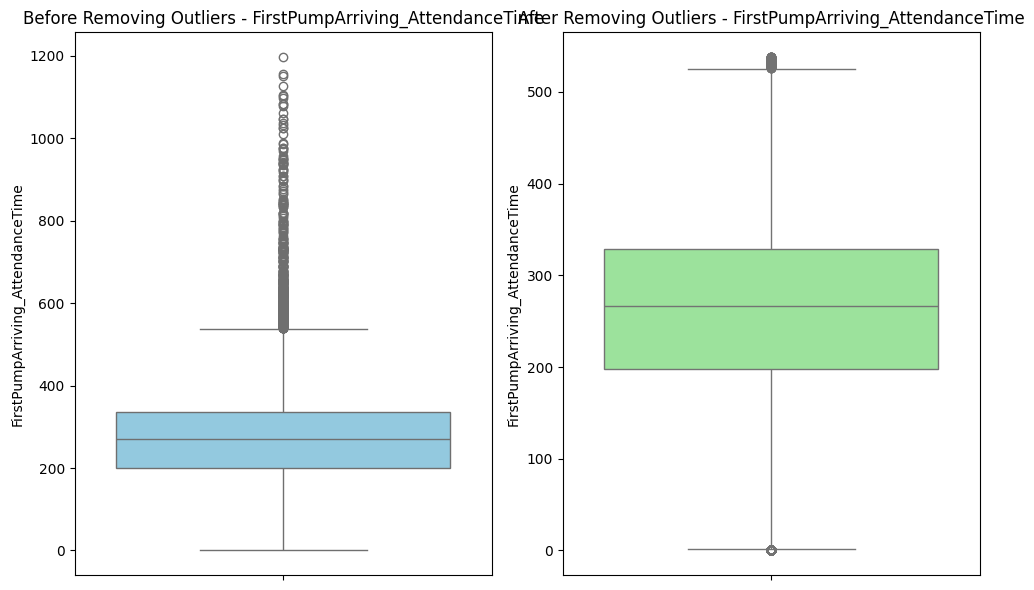

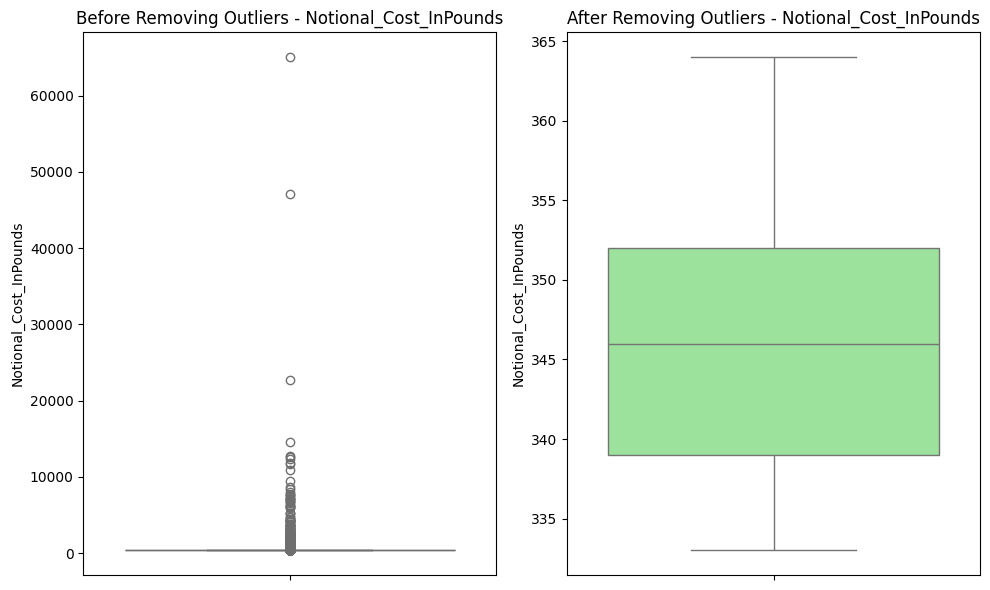

In [ ]:
# a function to define the interquartile ranges for the attributes
def plot_before_after_outliers(df, column):
    # Calculate quartiles and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Set up the figure size
    plt.figure(figsize=(10, 6))

    # Create a boxplot before removing outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Before Removing Outliers - {column}')
    plt.ylabel(column)

    # Create a boxplot after removing outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_no_outliers[column], color='lightgreen')
    plt.title(f'After Removing Outliers - {column}')
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

# Use the function for the 'FirstPumpArriving_AttendanceTime' and 'Notional_Cost_InPounds' columns
plot_before_after_outliers(df, 'FirstPumpArriving_AttendanceTime')
plot_before_after_outliers(df, 'Notional_Cost_InPounds')

In the attribute **FirstPumpArriving_AttendanceTime**, there are still some outliers even after implementing Interquartile Range (IQR). This is because of the misdistribution of value counts shown below:

In [ ]:
df['FirstPumpArriving_AttendanceTime'].value_counts()

0       1643
281       88
273       86
287       85
252       83
        ... 
839        1
686        1
1098       1
68         1
43         1
Name: FirstPumpArriving_AttendanceTime, Length: 769, dtype: int64

This can be resolved by removing the current outliers manually:

In [ ]:
#Number of rows before removing the outliers
num_rows_before = len(df)

# Removing rows where 'FirstPumpArriving_AttendanceTime' intance values are less than/equal to 57 and more than/equal to 500
df.drop(df[(df['FirstPumpArriving_AttendanceTime'] <= 57) | (df['FirstPumpArriving_AttendanceTime'] >= 500)].index, inplace=True)

# Number of rows after removing the outliers
num_rows_after = len(df)

# Display the number of rows before and after filtering
print(f"Number of rows before filtering outliers: {num_rows_before}")
print(f"Number of rows after filtering outliers: {num_rows_after}")
print(f"Number of rows removed: {num_rows_before - num_rows_after}")

# tabulating the new results
data = df['FirstPumpArriving_AttendanceTime'].value_counts()

# Create a DataFrame from the value counts
value_counts_table = pd.DataFrame(data)

# Print the table using tabulate
print(tabulate(value_counts_table, headers=['FirstPumpArriving_AttendanceTime', 'Instances'], tablefmt='pretty'))

Number of rows before filtering outliers: 16953
Number of rows after filtering outliers: 14393
Number of rows removed: 2560
+----------------------------------+-----------+
| FirstPumpArriving_AttendanceTime | Instances |
+----------------------------------+-----------+
|               281                |    88     |
|               273                |    86     |
|               287                |    85     |
|               263                |    83     |
|               252                |    83     |
|               266                |    83     |
|               256                |    82     |
|               280                |    81     |
|               254                |    79     |
|               272                |    78     |
|               271                |    78     |
|               255                |    77     |
|               262                |    76     |
|               250                |    75     |
|               279                |    75 

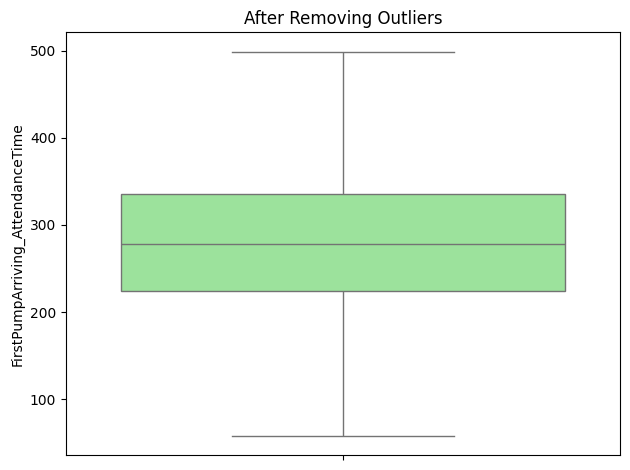

In [ ]:
# Plot the "FirstPumpArriving_AttendanceTime to check for outliers"
plt.subplot(1,1,1)
sns.boxplot(y=df['FirstPumpArriving_AttendanceTime'], color='lightgreen')
plt.title(f'After Removing Outliers')
plt.ylabel('FirstPumpArriving_AttendanceTime')

plt.tight_layout()
plt.show()

Now that the attribute **FirstPumpArriving_AttendanceTime** has no outliers meaning the column is now perfectly representing the IQR.

## **7.4. Dealing with imbalanced classes and outliers in the categorical attributes**

From the analysis in the Data Understanding, the columns identified to be imbalanced are **PropertyCategory, PropertyType, AddressQualifier, FirstPumpArriving_DeployedFromStation, SecondPumpArriving_DeployedFromStation** of which only the **PropertyCategory** attribute will be used for modelling.

According to a Kaggle article (KC, 2020), addressing imbalanced classes can be accomplished by implementing techniques like Oversampling (adding more copies of the minority class) and Undersampling (removing some observations of the majority class), but the imbalanced attributes were chosen by the researcher to be left unchanged because of the fact that only one column is need to be addressed, and the following reasons:
- In Oversampling, generating artificial data may lead to deceptive results and not reflect on the actual cause of an event (Aaron, 2020) and the decision to generate more data for imbalanced classes will depend on the modelling being used as it is insignificant to generate more data for descriptive modelling (Hotz, 2023)
- In Undersampling, it can be a good choice when there is a ton of data - think millions of rows, but a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set (KC, 2020).

## **7.5. Dealing with potential data consistency issues**

From the dataset, the date column can be potentially exposed to consistency issues. Example, some date will have format dd/mm/yy, dd-mm-yy, dd-mm-yyyy or yyyy-mm-dd. To ensure all dates values consistent and in the same format, the following code is recommended (Eddine, 2019):

In [ ]:
df['DateOfCall'] = pd.to_datetime(df['DateOfCall'])
df['DateOfCall']

96       2019-01-01
105      2019-01-01
112      2019-01-01
120      2019-01-01
128      2019-01-01
            ...    
426314   2022-11-30
426319   2022-11-30
426392   2022-11-30
426407   2022-11-30
426441   2022-11-30
Name: DateOfCall, Length: 14393, dtype: datetime64[ns]

## **7.6. Constructing New Features**

In order to answer the first question in the business understanding "**How time of a day and a year (season) affect which type of properties are calling most for fire hazards?**", new columns, **Season** and **DayTime**, need to be constructed from the current **DateOfCall** and **HourOfCall** respectively.

In [ ]:
# Function to determine season based on DateOfCall,
def get_season(row):
    month = row['DateOfCall'].month # get the month from each dateOfCall
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Apply the function to create 'Season' column
df['Season'] = df.apply(get_season, axis=1)
df['Season']

96        Winter
105       Winter
112       Winter
120       Winter
128       Winter
           ...  
426314    Autumn
426319    Autumn
426392    Autumn
426407    Autumn
426441    Autumn
Name: Season, Length: 14393, dtype: object

In [ ]:
# Define function to categorize time periods
def categorize_time(row):
    hour = int(row['HourOfCall'])

    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Night'
    else:
        return 'Midnight/Dawn'

# Apply the categorize_time function to create the 'DayTime' column
df['DayTime'] = df.apply(categorize_time, axis=1)
df['DayTime']

96        Midnight/Dawn
105       Midnight/Dawn
112       Midnight/Dawn
120             Morning
128             Morning
              ...      
426314        Afternoon
426319        Afternoon
426392            Night
426407            Night
426441            Night
Name: DayTime, Length: 14393, dtype: object

Since new "Season" and "DayTime" columns were created, the "DateOfCall" and "HourOfCall" columns can be deleted from the data as shown below with the following code:

In [ ]:
# Drop redundant columns  (DateOfCall and HourOfCall)
df.drop(['DateOfCall', 'HourOfCall'], axis=1, inplace=True)

In [ ]:
# Checking the attributes in the data after dropping redundant columns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14393 entries, 96 to 426441
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CalYear                                14393 non-null  int64  
 1   TimeOfCall                             14393 non-null  object 
 2   IncidentGroup                          14393 non-null  object 
 3   StopCodeDescription                    14393 non-null  object 
 4   PropertyCategory                       14393 non-null  object 
 5   PropertyType                           14393 non-null  object 
 6   AddressQualifier                       14393 non-null  object 
 7   Postcode_district                      14393 non-null  object 
 8   UPRN                                   14393 non-null  float64
 9   USRN                                   14393 non-null  int64  
 10  IncGeo_WardCode                        14393 non-null  object 
 11  

(14393, 25)

## **7.7. Feature Normalisation**

From the chosen attributes, only the "Notional_Cost_InPounds" have a wide range of values and is a good candidate for the feature normalisation which is performed to transform features to be on a similar scale that improves the performance and training stability of the model (Google for Developers, 2022).

Min-Max scaling and Z-score normalization (standardization) are the two fundamental techniques for normalization (Jaiswal, 2024) and both can be great to use in certain cases:
- Min-max scaling is a good choice when (Jaiswal, 2024):
  - The approximate upper and lower bounds of the dataset is known, and the dataset has few or no outliers
  - When the data distribution is unknown or non-Gaussian, and the data is approximately uniformly distributed across the range
  - When maintaining the distribution’s original shape is essential
- Z-score normalization technique is particularly useful when dealing with algorithms that assume normally distributed data, such as many linear models. Unlike the min-max scaling technique, feature values are not restricted to a specific range in the standardization technique. This normalization technique basically represents features in terms of the number of standard deviations that lie away from the mean (Jaiswal, 2024).

Since the attribute **Notional_Cost_InPounds** has a normal distribution after removing outliers in an above subsection, the z-score is suitable for normalising the column values. The implementation can be found in the code below:

In [ ]:
# Normalise Notional_Cost_InPounds using z-score normalisation
normalised_df = df

normaliser = StandardScaler()

normalised_df['Notional_Cost_InPounds'] = normaliser.fit_transform(normalised_df['Notional_Cost_InPounds'].values.reshape(-1,1))

# ct = ColumnTransformer([
#         ('Normalised', StandardScaler(), make_column_selector('Notional_Cost_InPounds'))
#     ], remainder='passthrough')

# normalised_df_copy = pd.DataFrame(ct.fit_transform(df_copy), columns=ct.get_feature_names_out())

In [ ]:
normalised_df

,CalYear,TimeOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,UPRN,USRN,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional_Cost_InPounds,NumCalls,Season,DayTime
96,2019,03:09:01,False Alarm,AFA,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Within same building,E2,0.000000e+00,20900154,...,273,Bethnal Green,2,2,2,1,-0.187300,1,Winter,Midnight/Dawn
105,2019,04:26:33,False Alarm,False alarm - Good intent,Outdoor,Road surface/pavement,In street outside gazetteer location,N16,1.000210e+11,20900605,...,357,Stoke Newington,2,2,2,1,-0.187300,1,Winter,Midnight/Dawn
112,2019,05:31:16,Fire,Secondary Fire,Outdoor Structure,Small refuse/rubbish container,On land associated with building,N1,1.000824e+10,20950201,...,260,Shoreditch,2,2,2,1,-0.187300,2,Winter,Midnight/Dawn
120,2019,06:26:42,Fire,Secondary Fire,Outdoor Structure,Common external bin storage area,On land associated with building,N1,1.000823e+10,20950201,...,238,Shoreditch,2,2,2,1,-0.187300,1,Winter,Morning
128,2019,07:34:02,False Alarm,AFA,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,EC1V,0.000000e+00,20900761,...,157,Shoreditch,2,2,2,1,-0.187300,1,Winter,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426314,2022,14:08:26,False Alarm,AFA,Non Residential,Infant/Primary school,Within same building,N4,1.000230e+11,20901093,...,408,Tottenham,1,1,1,1,-0.138401,1,Autumn,Afternoon
426319,2022,14:31:14,False Alarm,AFA,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,E9,0.000000e+00,20900165,...,232,Leyton,5,5,6,2,0.435769,2,Autumn,Afternoon
426392,2022,18:24:50,False Alarm,AFA,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,N16,0.000000e+00,20901554,...,173,Stoke Newington,1,1,1,1,-0.138401,1,Autumn,Night
426407,2022,19:00:28,False Alarm,AFA,Non Residential,Other office/call centre type building,Correct incident location,E8,1.000834e+10,20900066,...,369,Homerton,1,1,1,1,-0.138401,1,Autumn,Night


In [ ]:
normalised_df['Notional_Cost_InPounds'].value_counts()

-0.157330     3375
-0.177836     2984
-0.166794     2852
-0.138401     2371
-0.187300      695
              ... 
 5.704255        1
 16.499918       1
 12.613227       1
 6.238990        1
 9.622494        1
Name: Notional_Cost_InPounds, Length: 84, dtype: int64

In [ ]:
df = normalised_df
df

,CalYear,TimeOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,AddressQualifier,Postcode_district,UPRN,USRN,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional_Cost_InPounds,NumCalls,Season,DayTime
96,2019,03:09:01,False Alarm,AFA,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Within same building,E2,0.000000e+00,20900154,...,273,Bethnal Green,2,2,2,1,-0.187300,1,Winter,Midnight/Dawn
105,2019,04:26:33,False Alarm,False alarm - Good intent,Outdoor,Road surface/pavement,In street outside gazetteer location,N16,1.000210e+11,20900605,...,357,Stoke Newington,2,2,2,1,-0.187300,1,Winter,Midnight/Dawn
112,2019,05:31:16,Fire,Secondary Fire,Outdoor Structure,Small refuse/rubbish container,On land associated with building,N1,1.000824e+10,20950201,...,260,Shoreditch,2,2,2,1,-0.187300,2,Winter,Midnight/Dawn
120,2019,06:26:42,Fire,Secondary Fire,Outdoor Structure,Common external bin storage area,On land associated with building,N1,1.000823e+10,20950201,...,238,Shoreditch,2,2,2,1,-0.187300,1,Winter,Morning
128,2019,07:34:02,False Alarm,AFA,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,EC1V,0.000000e+00,20900761,...,157,Shoreditch,2,2,2,1,-0.187300,1,Winter,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426314,2022,14:08:26,False Alarm,AFA,Non Residential,Infant/Primary school,Within same building,N4,1.000230e+11,20901093,...,408,Tottenham,1,1,1,1,-0.138401,1,Autumn,Afternoon
426319,2022,14:31:14,False Alarm,AFA,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Within same building,E9,0.000000e+00,20900165,...,232,Leyton,5,5,6,2,0.435769,2,Autumn,Afternoon
426392,2022,18:24:50,False Alarm,AFA,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,N16,0.000000e+00,20901554,...,173,Stoke Newington,1,1,1,1,-0.138401,1,Autumn,Night
426407,2022,19:00:28,False Alarm,AFA,Non Residential,Other office/call centre type building,Correct incident location,E8,1.000834e+10,20900066,...,369,Homerton,1,1,1,1,-0.138401,1,Autumn,Night


The attribute **Notional_Cost_InPounds** is now normalised and ready to be used in modelling.

## **7.8. Determining if attributes can be used for the analysis (Feature Selection)**

For the final business problems, the following attributes will be used for the analysis:

In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14393 entries, 96 to 426441
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CalYear                                14393 non-null  int64  
 1   TimeOfCall                             14393 non-null  object 
 2   IncidentGroup                          14393 non-null  object 
 3   StopCodeDescription                    14393 non-null  object 
 4   PropertyCategory                       14393 non-null  object 
 5   PropertyType                           14393 non-null  object 
 6   AddressQualifier                       14393 non-null  object 
 7   Postcode_district                      14393 non-null  object 
 8   UPRN                                   14393 non-null  float64
 9   USRN                                   14393 non-null  int64  
 10  IncGeo_WardCode                        14393 non-null  object 
 11  

(14393, 25)

Since the questions we are dealing with are the 1, and 4 (and, will try to experiment with the question 5 as well), we can focus on the columns related to those questions in modelling:
- **Season, DayTime, and PropertyCategory** will be used to address question 1: "*How time of a day and a year (season) affect which type of properties are calling most for fire hazards?*"
- **IncidentGroup, Postcode_district, and Season** will be used in addressing question 4: "*Find out which postcode district the fire calls coming from and what seasons are most likely to be classified as false alarms?*"
- **CalYear and FirstPumpArriving_AttendanceTime** will be used for the question 5: "Is the time from the call to the first pump deployment reducing year by year?"
- All other columns will be utilised depending on how they can add value to the models and to give more information.

## **7.9. Finding the correlation between the attributes**

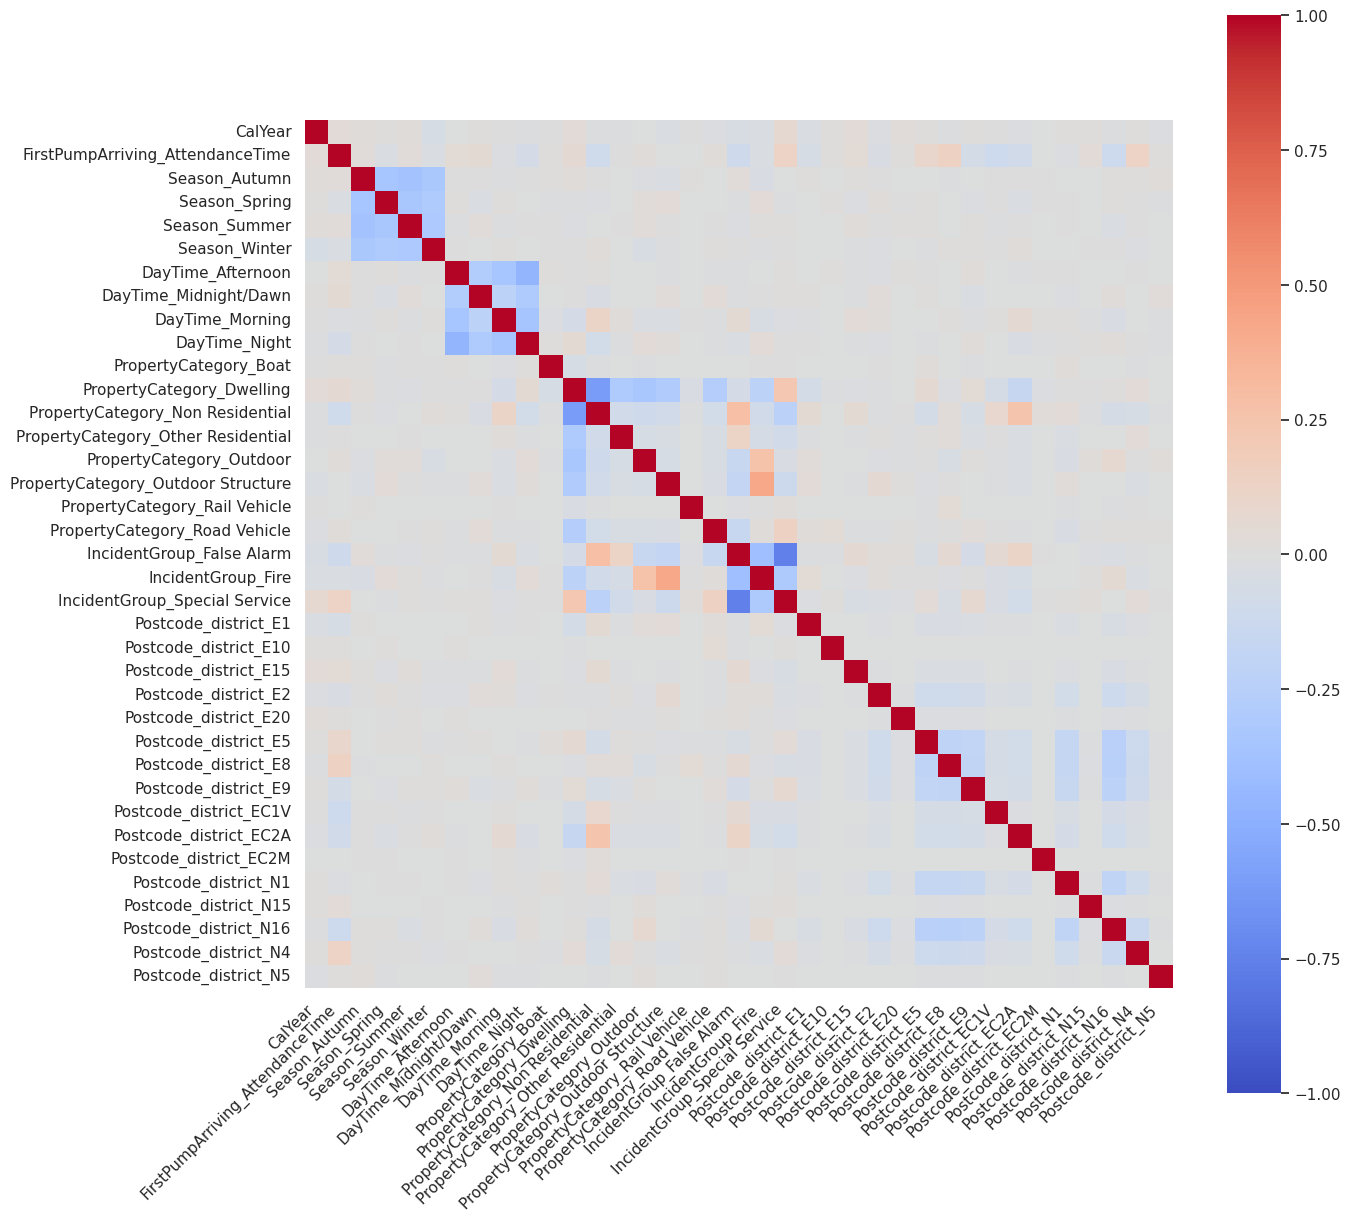

In [ ]:
selected_columns = df[['Season', 'DayTime', 'PropertyCategory', 'IncidentGroup', 'Postcode_district', 'CalYear', 'FirstPumpArriving_AttendanceTime']]

sns.set (rc = {'figure.figsize':(14, 14)}) # Set heatmap size

my_data_oh = pd.get_dummies(selected_columns)

corr = my_data_oh.corr(method='pearson') # Perason's correlation (-1, 1)
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    # cmap=sns.diverging_palette(10, 220, n=500),
    cmap = 'coolwarm',
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the graph above, it can be observed there is a relatively good correlation between IncidentGroup_Fire and PropertyCategory_RailVehicle implying the more incidents coming from "Fire" triggers, the higher the chances of them being from "Rail Vehicle" Property Category. It also shows a moderate correlation between the postcode district code EC2A and the "Other Residential" Property Category meaning more fire calls come from the EC2A post code and they are other types of residential properties not mentioned in the attribute. Finally, there is also a slightly weak correlation between False Alarm and "Outdoor" property category.

## **7.10. Data splitting for training, testing, and validation**

The data is split into training and testing below, which will the train data will be used under modelling section for the predictive modelling (either decision tree or regression). There will be no validation data because only one model will be created, hence, no need to validate it against other models.

In [ ]:
data_predictive = df
# Splitting the dataset into 80% training and 20% testing
X_train, X_test= train_test_split(data_predictive, test_size=0.2, random_state=42)

# 'test_size=0.2' specifies the size of the testing set (20% in this case)
# 'random_state=42' ensures reproducibility by fixing the random seed

# X_train contains 80% of the data for training
# X_test contains 20% of the data for testing

A more robust spliting will be done under the predictive modelling.

# **8. Modelling**

Now that the data has been pre-processed, it is time to find out which attributes can be meaningfully grouped to find relations between them through Association Analysis.

## **8.1. Descriptive modelling**

In [ ]:
columns_association = df[['IncidentGroup','Season', 'DayTime', 'PropertyCategory',]]
columns_association

,IncidentGroup,Season,DayTime,PropertyCategory
96,False Alarm,Winter,Midnight/Dawn,Dwelling
105,False Alarm,Winter,Midnight/Dawn,Outdoor
112,Fire,Winter,Midnight/Dawn,Outdoor Structure
120,Fire,Winter,Morning,Outdoor Structure
128,False Alarm,Winter,Morning,Dwelling
...,...,...,...,...
426314,False Alarm,Autumn,Afternoon,Non Residential
426319,False Alarm,Autumn,Afternoon,Dwelling
426392,False Alarm,Autumn,Night,Dwelling
426407,False Alarm,Autumn,Night,Non Residential


Text(66.24999999999999, 0.5, 'DayTime')

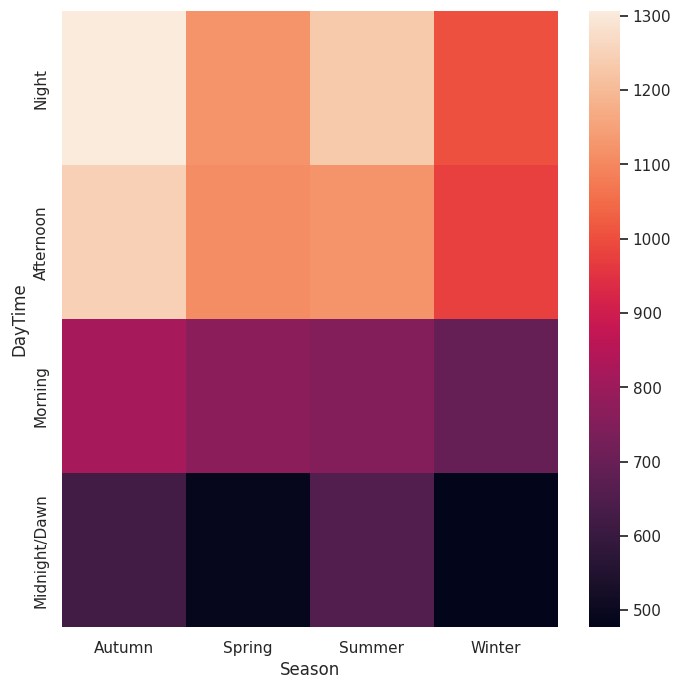

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({x_label: grp['DayTime'].value_counts() for x_label, grp in columns_association.groupby('Season')})
sns.heatmap(df_2dhist)
plt.xlabel('Season')
plt.ylabel('DayTime')

From the preliminary graph, we can see there are strong correlations between Midnight and Seasons like Spring and Winter. We can find more associations rules in the next subsections.

In [ ]:
# converting the categorical columns to matrix
data_one_hot = pd.get_dummies(columns_association)
data_one_hot

,IncidentGroup_False Alarm,IncidentGroup_Fire,IncidentGroup_Special Service,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,DayTime_Afternoon,DayTime_Midnight/Dawn,DayTime_Morning,DayTime_Night,PropertyCategory_Boat,PropertyCategory_Dwelling,PropertyCategory_Non Residential,PropertyCategory_Other Residential,PropertyCategory_Outdoor,PropertyCategory_Outdoor Structure,PropertyCategory_Rail Vehicle,PropertyCategory_Road Vehicle
96,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
105,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
112,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
120,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
128,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426314,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
426319,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426392,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
426407,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
# generating all itemset whose support is not less than 20% (0.2) (the mininum support threshold)
data = data_one_hot
freq_item = apriori(data, min_support = 0.2, use_colnames = True, verbose = 1)
freq_item

Processing 90 combinations | Sampling itemset size 2


,support,itemsets
0,0.493365,(IncidentGroup_False Alarm)
1,0.368096,(IncidentGroup_Special Service)
2,0.277565,(Season_Autumn)
3,0.242340,(Season_Spring)
4,0.261447,(Season_Summer)
5,0.218648,(Season_Winter)
6,0.309178,(DayTime_Afternoon)
7,0.210797,(DayTime_Morning)
8,0.324255,(DayTime_Night)
9,0.669423,(PropertyCategory_Dwelling)


The above 14 itemsets with more than 20% support were generated after we add **IncidentGroup** to the originally intented attributes **Season, DayTime, PropertyCategory**.

In [ ]:
#Generateing high confidence rules from each frequent itemset which have confidence not less than the minimum confidence threshold​ (0.6)
association_rule = association_rules(freq_item, metric = "confidence", min_threshold = 0.6)
association_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(IncidentGroup_False Alarm),(PropertyCategory_Dwelling),0.493365,0.669423,0.314111,0.636671,0.951075,-0.016159,0.909857,-0.092178
1,(IncidentGroup_Special Service),(PropertyCategory_Dwelling),0.368096,0.669423,0.298270,0.810306,1.210455,0.051858,1.742685,0.275143
2,(DayTime_Afternoon),(PropertyCategory_Dwelling),0.309178,0.669423,0.207462,0.671011,1.002373,0.000491,1.004829,0.003427
3,(DayTime_Night),(PropertyCategory_Dwelling),0.324255,0.669423,0.228028,0.703235,1.050510,0.010964,1.113938,0.071154


Here, the generated association rules are going to be explained one by one.

1. **IncidentGroup (False Alarm) → PropertyCategory (Dwelling)**:

  **Support: 0.314111** (Occurance of False Alarm in the Dwelling category at the same time)

  **Confidence: 0.636671** (The chance of the incident being in the Dwelling category given it is triggered by a False Alarm)

  **Lift: 0.951075**

  **Analysis:** Although having 31% support and 63% confidence, the lift of 0.95 indicates that the False Alarm trigger and Dwelling property type are closer to being independent on each other if not inhibiting.


2. **IncidentGroup (Special Service) → PropertyCategory (Dwelling)**:

  **Support: 0.298270** (Frequency of values Special Serive from IncidentGroup and Dwelling in PropertyCategory)

  **Confidence: 0.810306** (The likelyhood of the incident being in the Dwelling category given it is triggered by a Special Service)

  **Lift: 1.210455**

  **Analysis:** The lift of 1.21 shows that the occurance of Special Service prompts the occurance of Dwelling.


3. **DayTime (Afternoon) → PropertyCategory (Dwelling)**:

  **Support: 0.207462** (Occurance of fire during Afternoon in the Dwelling property)

  **Confidence: 0.671011** (The chance of the fire happeing during Afternoon given it is in a Dwelling property)

  **Lift: 1.002373**

  **Analysis:** The values in this rule are independed on each other because of the lift value being 1.


4. **DayTime (Night) → PropertyCategory (Dwelling)**:

  **Support: 0.228028** (Frequency of the fire happening during Night in a Dwelling property)

  **Confidence: 0.703235** (The chance of the fire happeing during Night given it is in a Dwelling property)

  **Lift: 1.050510**

  **Analysis:** This rule is more likely to prompt the relation possible that it is in a Dwelling property whenever there is a fire during Night.


The graph below shows the rules of the support and confidence of the association above, which shows that most of the confidence in the association is below 75% which means there are only few relations between the specified attributes in the dataset.

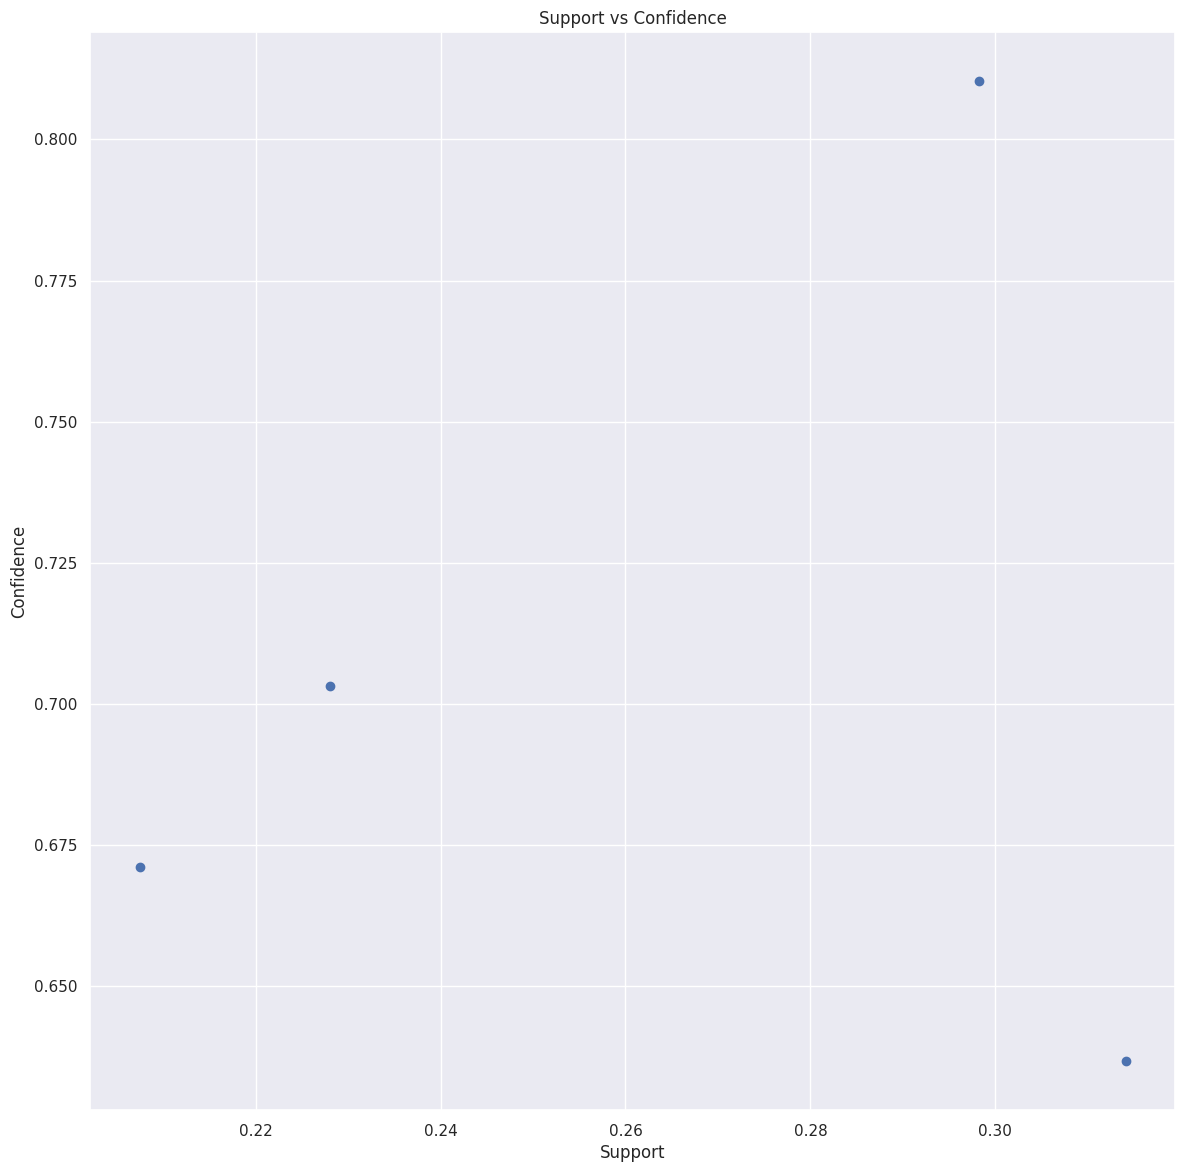

In [ ]:
# Show stong rule set
plt.scatter(association_rule['support'], association_rule['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

## **8.2. Predictive modelling**

The aim is to predict **how likely an incident is triggered in a certain season will be classified as False Alarm**. A decision tree was selected over regression for this predictive modelling because it performs the automatic feature selection to identify the attribute to be the root (top) of the tree, it is easier to interpret, and can be trained on a small dataset (Geeksforgeeks, 2021). However, according to Dr. Daqing Chen, (2023), decision trees are best for categorical nominal target values while regression is best for numerical values, due to this, the target value will stay categorised into "1" (Yes) and "0" (No) by transforming the current "Fire", "False Alarm", and "Special Service" values which the attribute range is already in.

- Fire and Special Service will be categorised as "0" (labelled: No)
- False Alarm will be categorised as "1" (labelled: Yes)

In [ ]:
# Prepare the data for the Decision Tree
features = ['Postcode_district', 'Season']

X = df[features]
y = df['IncidentGroup']

# Replace the labels with Yes and No
y = y.replace({'False Alarm': 1, 'Fire': 0, 'Special Service': 0})

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
y

96        1
105       1
112       0
120       0
128       1
         ..
426314    1
426319    1
426392    1
426407    1
426441    1
Name: IncidentGroup, Length: 14393, dtype: int64

In [ ]:
# Create Decision Tree classifier
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 1234,
            max_depth = 4, min_samples_leaf = 1)
model = clf.fit(X_train, y_train)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_9 <= 0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_6 >  0.50
|   |   |   |--- feature_19 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_19 >  0.50
|   |   |   |   |--- class: 1
|   |--- feature_8 >  0.50
|   |   |--- feature_16 <= 0.50
|   |   |   |--- feature_19 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_19 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_16 >  0.50
|   |   |   |--- class: 1
|--- feature_9 >  0.50
|   |--- feature_17 <= 0.50
|   |   |--- feature_16 <= 0.50
|   |   |   |--- feature_18 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_18 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_16 >  0.50
|   |   |   |--- class: 1
|   |--- feature_17 >  0.50
|   |   |--- class: 1



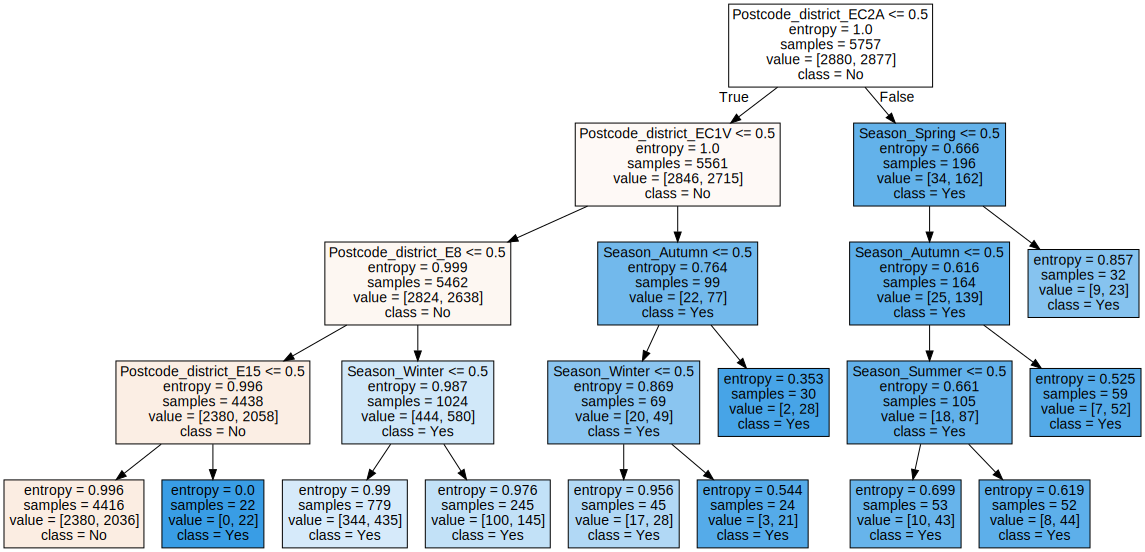

In [ ]:
# Visualize the decision tree
class_names = ['No', 'Yes']
feature_names = X_train.columns

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_names,
                                filled=True)

graph = graphviz.Source(dot_data, format="webp")
graph

From the Decision Tree formed above, there are postcode districts listed with the highest numbers of False Alarms since the nodes are checking for the "postcode_district is less than 0.5" which indicates "if it is not the current district" (!Postcode_district) then it extends to left (True) or to the right (False, meaning it is checking for False Alarms in the current district).

Between seasons, the False Alarm triggers happen most in winter according to the decision tree above

# **9. Evaluation**

## **9.1. Predictive modelling evaluation**

Confusion Matrix:
[[3623  789]
 [3065 1159]]


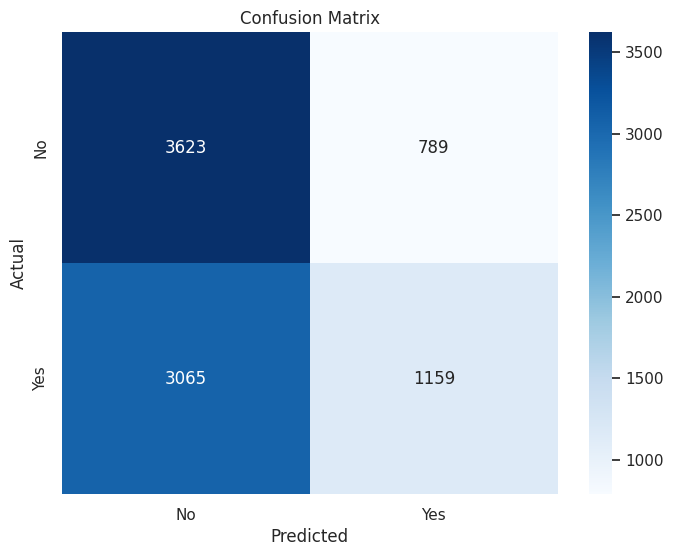

In [ ]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**True Positives**: The decision tree accurately predicted 3623 cases where fire trigger was not a False Alarm.

**False Nagatives**: In 798 cases, the trigger was not the False Alarm either but the model incorrectly labelled them as False Alarms

**False Positives**: There were other 3065 False Alarm cases but the model mistakenly predicted them as not being False Alarms

**True Nagatives**: Only in 1159 cases, the model labelled the False Alarm cases correctly

Now, the accuracy, precision, sensitivity (recall) and f1-score will be used to further evaluate the model:

In [ ]:
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:")
print(report)

Accuracy: 0.5537
Classification Report:
              precision    recall  f1-score   support

          No       0.54      0.82      0.65      4412
         Yes       0.59      0.27      0.38      4224

    accuracy                           0.55      8636
   macro avg       0.57      0.55      0.51      8636
weighted avg       0.57      0.55      0.52      8636



**Accuracy**: Number of correct predictions / Total number of predictions > *(TP + TN) / (TP + TN + FP + FN)*.
  - Overall accuracy: **55.37%** which means that the model's predictions are accurate for approximately 55% of the samples in the test set.

**Precision**: *TP / (TP + FP)* for "Yes" classes, *TN / (TN + FN)* for "No" classes. Measures the accuracy of the positive predictions. It does not evaluate the correctly predicted negative cases (Geeksforgeeks, 2023).
  - Yes: 59% of the samples predicted as Yes were correct.
  - No: 54% of the predicted samples with No were correct.

**Recall**: *TP / (TP + FN)* for "Yes" classes, *TN / (FP + TN)* for "No" classes. Measures the proportion of actual positive samples that were correctly predicted by the model.
  - Yes: 27% of the Yes samples were predicted correctly.
  - No: 82% of the No samples were predicted accurately.

**F1-score**: Interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0 (scikit-learn developers, 2024)
  - Yes: has a relatively good score of 0.65 which was mainly driven by the high recall rate.
  - No: has a low score of 0.38 that is being affected by mainly the low recall rate.

Generally, the decision tree model is great at accurately predicting the "No" labels and struggles with the "Yes" labels. This is might be because of the fact that the categorisation of "Fire" and "Secrect Service" into the "No" label and it created imbalance in the new "0" (No) attribute compared to the new "1" (Yes) values.

## **9.2. Descriptive modelling evaluation**

The following rules generated thorugh Association Analysis will be used for the evaluation because the occurence of the antecedent prompts the occurance of the consequent in both rules:
  - IncidentGroup (Special Service) → PropertyCategory (Dwelling)
  - DayTime (Night) → PropertyCategory (Dwelling)

1. There are usually more calls coming from Special Service triggers in properties categorised as "Dwelling".
2. The calls happen more during Night time and it is likely that they are from Dwelling properties.

Related suggestions are going to be made in the next section but now it is time to confirm the accuracy of the rules through the Pearson's correlation:

In [ ]:
cols = df[['IncidentGroup','Season', 'DayTime', 'PropertyCategory']]
data_ohe = pd.get_dummies(cols)
corr = data_ohe.corr(method='pearson') # Pearson's correlation (-1, 1)
corr

,IncidentGroup_False Alarm,IncidentGroup_Fire,IncidentGroup_Special Service,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,DayTime_Afternoon,DayTime_Midnight/Dawn,DayTime_Morning,DayTime_Night,PropertyCategory_Boat,PropertyCategory_Dwelling,PropertyCategory_Non Residential,PropertyCategory_Other Residential,PropertyCategory_Outdoor,PropertyCategory_Outdoor Structure,PropertyCategory_Rail Vehicle,PropertyCategory_Road Vehicle
IncidentGroup_False Alarm,1.000000,-0.395736,-0.753167,0.024519,-0.009034,-0.022938,0.007189,-0.010667,-0.010011,0.050470,-0.025690,-0.003463,-0.068704,0.285412,0.124948,-0.149217,-0.179093,-0.020746,-0.148801
IncidentGroup_Fire,-0.395736,1.000000,-0.306072,-0.031647,0.031340,0.014040,-0.013130,-0.000218,0.003546,-0.043553,0.035418,0.002881,-0.219673,-0.087143,-0.056661,0.260741,0.428667,0.004691,0.016514
IncidentGroup_Special Service,-0.753167,-0.306072,1.000000,-0.002748,-0.013084,0.013722,0.001953,0.011214,0.007838,-0.021122,0.001261,0.001526,0.228574,-0.233447,-0.088939,-0.032087,-0.121403,0.018146,0.142423
Season_Autumn,0.024519,-0.031647,-0.002748,1.000000,-0.350557,-0.368794,-0.327894,0.003301,0.000727,-0.008420,0.003514,0.008797,0.017037,0.003750,-0.000848,-0.017263,-0.024647,0.013098,-0.006136
Season_Spring,-0.009034,0.031340,-0.013084,-0.350557,1.000000,-0.336493,-0.299175,0.010731,-0.024738,0.012618,-0.002425,-0.010837,-0.008943,-0.018707,-0.003960,0.028150,0.037237,-0.002605,-0.007705
Season_Summer,-0.022938,0.014040,0.013722,-0.368794,-0.336493,1.000000,-0.314738,-0.013834,0.029141,-0.015595,0.004671,0.001315,-0.015810,-0.003698,0.007589,0.028286,0.000080,-0.003687,0.005017
Season_Winter,0.007189,-0.013130,0.001953,-0.327894,-0.299175,-0.314738,1.000000,0.000006,-0.006123,0.012620,-0.006259,0.000306,0.007621,0.019262,-0.003045,-0.040552,-0.011986,-0.007569,0.009302
DayTime_Afternoon,-0.010667,-0.000218,0.011214,0.003301,0.010731,-0.013834,0.000006,1.000000,-0.287364,-0.345747,-0.463418,0.010357,0.002259,0.009863,-0.000845,-0.001740,-0.014232,-0.000524,-0.009024
DayTime_Midnight/Dawn,-0.010011,0.003546,0.007838,0.000727,-0.024738,0.029141,-0.006123,-0.287364,1.000000,-0.221998,-0.297552,-0.004358,0.007801,-0.036361,-0.000740,-0.005706,0.024820,-0.004055,0.035041
DayTime_Morning,0.050470,-0.043553,-0.021122,-0.008420,0.012618,-0.015595,0.012620,-0.345747,-0.221998,1.000000,-0.358005,-0.018288,-0.066638,0.116126,0.016252,-0.031220,-0.026374,0.005767,-0.008367


<Axes: >

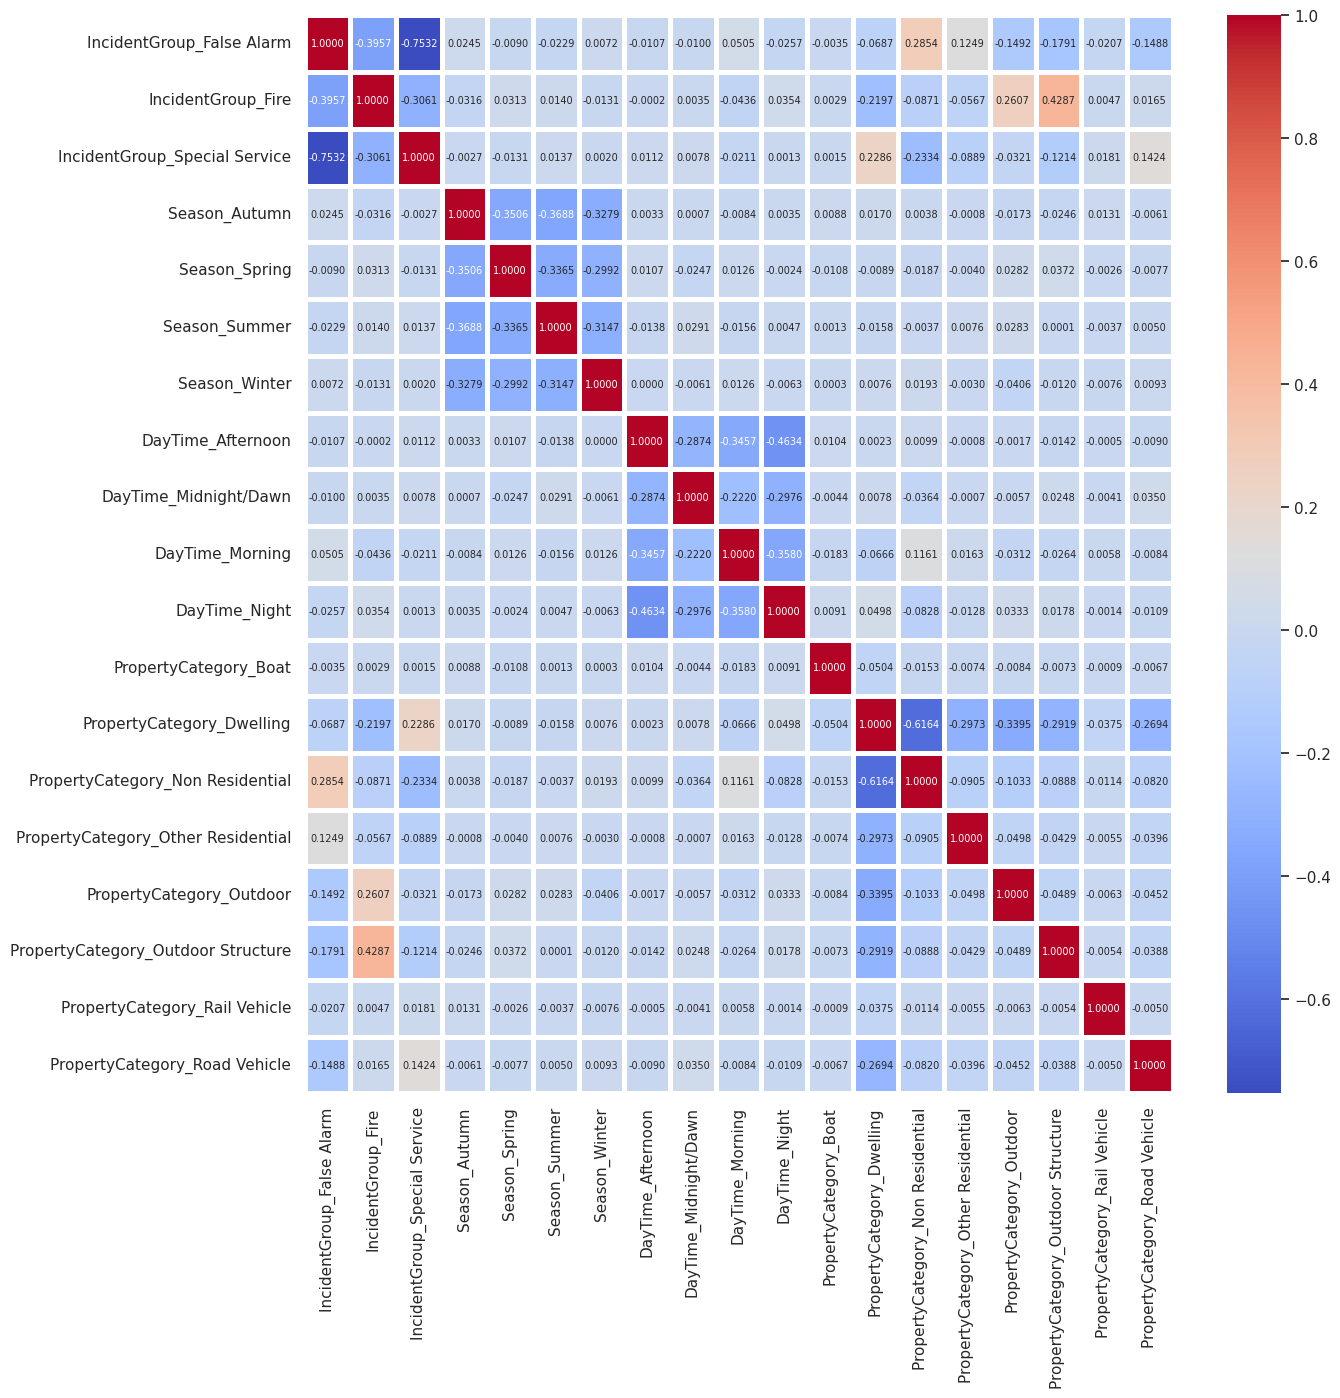

In [ ]:
sns.heatmap(corr, cmap='coolwarm', linewidths=2.5, annot=True, fmt='.4f', annot_kws={"size": 7})

From the correlation table and graph, it can be detected related Pearson's score for the rules identified in modelling:
  - IncidentGroup (Special Service) → PropertyCategory (Dwelling) - has a score of **0.2285**
  - DayTime (Night) → PropertyCategory (Dwelling) - has score of **0.0498**

Yet, the Pearson's correlation revealed there are stronger correlations in the dataset than the best one identified through Association Analysis. These newly discovered correlations can be seen below with their scores:
  - IncidentGroup (Fire) and PropertyCategory (Outdoor Structure) - has a 0.4286 score
  - IncidentGroup (False Alarm) and PropertyCategory (Non Residential) - has a 0.2854 score
  - IncidentGroup (Fire) and PropertyCategory (Outdoor) - has a 0.2607 score

This analysis can mean that the Association Analysis should not be the only way to detect all the possible correlations and all other methods should be experimented along with Association Analysis.

## **9.3. How the descriptive and predictive models created can be used to address the original business problems identified**

The business problems selected for modelling:
  - **How time of a day and a year (season) affect which type of properties are calling most for fire hazards?**

  - **Find out which postcode district the fire calls coming from and what seasons are most likely to be classified as false alarms?**

The below suggestions can be made from the analysis conducted in the project:
1. It reduces the first response time to put more fire briage stations around properties classified as "Dwelling".
2. It is best to be more prepared for potential fire hazards during Night time, especially in the winter season.
3. Along with the postcode districts, the probability of calls to be classified as "False Alarm" in certain seasons is provided below which is useful to deal with those areas and find solutions to reduce the "False Alarms" calls:
  - In the "EC2A" postcode district, it is likely that calls coming in Spring, Autumn, and Summer (in the order of most to least) will be False Alarms.
  - In the "EC1V", it is likely that calls coming in Autumn, and Winter will be False Alarms.
  - in the "E8", calls happening in Winter are likely False Alarms.
4. Any outdoor area or structure should be carefully examined for potential Fire hazard
      - The high correlation between Outdoor area (and Structures) and Fire incident was discovered through the Pearson's method.


## **9.4. The summary of main findings**

Overall, it is clear from the business understanding to the evaluation that the properties classified as "Dwelling", "Outdoor" and "Non Residential" must be carefully examined for potential fire hazards since most fire incident call come from these types of properties in the dataset.

Moreover, more accidents occur in Hackney during the cold seasons like Winter and Autumn season than warm seasons. Lastly, the certain postcode districts, EC2A, EC1V and E8, make up a significant potion of all the fire calls.

The borough authorities can address and mitigate these fire hazard points in the specified locations by following the findings identified through the descriptive and predictive modelling.

# **10. Conclusion**

Throughout this report, it became clear that pre-processing the dataset, dealing with missing values, outliers, imbalances, and inconsistencies in both numerical and categorical attributes.

Trying different modelling techniques is also important to identify key insights in the dataset since some models may not represent all the data appropriately which was observed in the Association Analysis in this report. Checking the accuracy of each model is crucial to detect if the model is working as intended.

It has been insightful experience to carry out the tasks in this project and tought a lot about the end-to-end data analysis process. The plans for the future data projects is to learn to better process the data in order to better implement different modelling techniques.

## **References**

- IBM (2021) *CRISP-DM Help Overview*. Available at: https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview [Accessed 16 March 2024].
- Sridharan (2018) *CRISP-DM*. Available at: https://thinkinsights.net/data/crisp-dm [Accessed 16 March 2024].
- Chen (2024) *Week 02 Data Mining Methodology, Data and Data Types* [Accessed 16 March 2024].
- Zuo et al. (2019) *python - UnicodeDecodeError: 'utf8' codec can't decode byte 0xa5 in position 0: invalid start byte*. Available at: https://stackoverflow.com/questions/22216076/unicodedecodeerror-utf8-codec-cant-decode-byte-0xa5-in-position-0-invalid-s [Accessed 16 March 2024].
- Tuychiev (2023) *Understanding Skewness And Kurtosis And How to Plot Them*. Available at: https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis [Accessed 23 March 2024].
- Yugesh (2022) *How to detect and treat outliers in categorical data?*. Available at: https://analyticsindiamag.com/how-to-detect-and-treat-outliers-in-categorical-data [Accessed 24 March 2024]
- Chen (2024) *Week 03 Data Pre-processing and Exploration* [Accessed 25 March 2024].
- KC (2020) *Dealing with imbalanced class*. Available at: https://www.kaggle.com/code/manishkc06/dealing-with-imbalanced-class [Accessed 26 March 2024].
- Aaron (2020) *Using Synthetic Data for Imbalanced Classes in a Classification Model*. Available at: https://medium.com/swlh/using-synthetic-data-for-imbalanced-classes-in-a-classification-model-83dfd3ab453c [Accessed 26 March 2024].
- Hotz (2023) *What is CRISP DM?*. Available at: https://www.datascience-pm.com/crisp-dm-2 [Accessed 26 March 2024].
- Google for Developers (2022) *Normalization*. Available at: https://developers.google.com/machine-learning/data-prep/transform/normalization [Accessed 27 March 2024].
- Jaiswal (2024) *What is Normalization in Machine Learning? A Comprehensive Guide to Data Rescaling*. Available at: https://www.datacamp.com/tutorial/normalization-in-machine-learning [Accessed 27 March 2024].
- Geeksforgeeks (2021) *ML | Logistic Regression v/s Decision Tree Classification*. Available at: https://www.geeksforgeeks.org/ml-logistic-regression-v-s-decision-tree-classification [Accessed 27 March 2024].
- Chen (2023) *Week 10 Data Mining Modelling Approaches: A Comparison* [Accessed 27 March 2024].
- pandas (2024) *pandas documentation*. Available at: https://pandas.pydata.org/docs [Accessed 28 March 2024].